In [66]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import time
from scipy.interpolate import interp1d
sys.path.append("../../package/")
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#fig_post_def()

In [17]:
print(sys.path)
from THL_lib import sorting

['/Users/thlin/Dropbox/jupyter_notebook/Neutron_research/Neutron_research_code/AmBe/AmBe_neutron_scatter_TOF/Neutron_scatter_3in_30degree_2in_trigger', '/Users/thlin/Dropbox/jupyter_notebook/Neutron_research/Neutron_research_code/Neutron_experiment/PSD_optimization', '/Users/thlin/.vscode/extensions/ms-toolsai.jupyter-2022.9.1303220346/pythonFiles', '/Users/thlin/.vscode/extensions/ms-toolsai.jupyter-2022.9.1303220346/pythonFiles/lib/python', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python38.zip', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/lib-dynload', '', '/Users/thlin/Library/Python/3.8/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages', '../../package/', '../../package/']


ModuleNotFoundError: No module named 'THL_lib'

# Function

In [18]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

# Read File

In [332]:
folder = "../../../../data/NSTOF_experiment_data_Ver5/"
#folder = "../../../data/NSTOF_experiment_data/"

raw_data_1  =np.loadtxt(folder+"20220724AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")
raw_data_2  =np.loadtxt(folder+"20220725AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")
raw_data_3  =np.loadtxt(folder+"20220727AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")
raw_data_4  =np.loadtxt(folder+"20220729AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")
raw_data_5  =np.loadtxt(folder+"20220730AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_12hours.txt")   #72
raw_data_6  =np.loadtxt(folder+"20220801AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")   #84
raw_data_7  =np.loadtxt(folder+"20220802AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")   #96
raw_data_8  =np.loadtxt(folder+"20220803AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt") #108
raw_data_9  =np.loadtxt(folder+"20220812AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")   #120
raw_data_10 =np.loadtxt(folder+"20220813AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")   #132
raw_data_11 =np.loadtxt(folder+"20220814AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")   #146
raw_data_12 =np.loadtxt(folder+"20220815AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")   #170
raw_data_13 =np.loadtxt(folder+"20220816AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")   #182
raw_data_14 =np.loadtxt(folder+"20220901AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")   #194
raw_data_15 =np.loadtxt(folder+"20220906AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_12hours.txt")    #200
raw_data_16 =np.loadtxt(folder+"20220907AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")    #200
raw_data_17 =np.loadtxt(folder+"20220909AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")    #200
raw_data_18 =np.loadtxt(folder+"20220912AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")    #200
raw_data_19 =np.loadtxt(folder+"20220915AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")    #200
raw_data_20 =np.loadtxt(folder+"20220917AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")    #200
raw_data_21 =np.loadtxt(folder+"20220918AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")
raw_data_22 =np.loadtxt(folder+"20220920AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")
raw_data_23 =np.loadtxt(folder+"20220924AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")
raw_data_24 =np.loadtxt(folder+"20220906AmBe_HV1550_Trich0_3in150cm_Deg30_Ch4_2in2cm_Ch6_2in10cm_24hours.txt")

raw_data = np.zeros(shape=6)
print(raw_data)
for i in range(1,25):
    #print(i)
    add = globals()["raw_data_"+str(i)]  # convert string to variable name
    print(add.shape)
    raw_data=np.vstack((raw_data,add))

#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_PSD","Tri_LO_ch"])
#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_LO_ch"])

print(raw_data)
print(len(raw_data))
print(raw_data.shape)

[0. 0. 0. 0. 0. 0.]
(9210, 6)
(9818, 6)
(8956, 6)
(8998, 6)
(4587, 6)
(8844, 6)
(8813, 6)
(9628, 6)
(9826, 6)
(9714, 6)
(9586, 6)
(9296, 6)
(9313, 6)
(9557, 6)
(4943, 6)
(9468, 6)
(9268, 6)
(9361, 6)
(9281, 6)
(9301, 6)
(9297, 6)
(9448, 6)
(9086, 6)
(9386, 6)
[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00]
 [-3.12124e+02  1.82222e-01  2.25000e+02  4.00000e+00  3.43549e-01
   2.64300e+03]
 [ 1.20630e+01  2.91939e-01  9.18000e+02  4.00000e+00  2.41672e-01
   3.06200e+03]
 ...
 [ 6.40000e+00  2.37981e-01  4.16000e+02  4.00000e+00  2.65957e-01
   2.82000e+02]
 [ 6.16000e+00  2.61737e-01  4.40900e+03  4.00000e+00  2.33831e-01
   4.02000e+02]
 [ 7.40320e+01  4.06699e-01  6.27000e+02  6.00000e+00  3.65680e-01
   8.45000e+02]]
214986
(214986, 6)


# Processing  

## Light output convertion

In [333]:
Rec_Ch_To_LO = 0.000619
Tri_Ch_To_LO = 0.000580
raw_data_LO = raw_data.copy()
raw_data_LO[:,2] = raw_data[:,2]*Rec_Ch_To_LO
raw_data_LO[:,5] = raw_data[:,5]*Tri_Ch_To_LO
raw_data = pd.DataFrame(raw_data_LO,columns=["time_diff","Rec_PSD","Rec_LO","Tri_Det","Tri_PSD","Tri_LO"])
print(raw_data.head())
#neutron_signal[:,0] = neutron_signal[:,0]

   time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO
0      0.000  0.000000  0.000000      0.0  0.000000  0.00000
1   -312.124  0.182222  0.139275      4.0  0.343549  1.53294
2     12.063  0.291939  0.568242      4.0  0.241672  1.77596
3     10.657  0.288641  0.332403      4.0  0.225651  0.60146
4   -237.405  0.254545  0.408540      4.0  0.258065  0.41354


## PSD selection

In [334]:
#Signal processing
print(raw_data.shape)
mask_Tri_Ch4        = raw_data['Tri_Det']==4
mask_Rec_LO         = raw_data['Rec_LO']<10000*Rec_Ch_To_LO
mask_Rec_PSD_upper  = raw_data['Rec_PSD'] < 0.5
mask_Rec_PSD_lower  = raw_data['Rec_PSD'] > 0.3
mask_Tri_n_PSD_upper  = raw_data['Tri_PSD'] < 0.5
mask_Tri_n_PSD_lower  = raw_data['Tri_PSD'] > 0.3
mask_Tri_g_PSD_upper  = raw_data['Tri_PSD'] < 0.3
mask_Tri_g_PSD_lower  = raw_data['Tri_PSD'] > 0

#filter neutron in recording detector
pro_data = raw_data[(mask_Tri_Ch4 
                    & mask_Rec_LO
                    & mask_Rec_PSD_upper
                    & mask_Rec_PSD_lower 
                    )] 


print(pro_data.shape)
print(pro_data.head())
#not filter neutron in recording detector
# just for time delay correction
pro_data_all = raw_data[(mask_Tri_Ch4 
                        & mask_Rec_LO)]



(214986, 6)
(61098, 6)
    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO
5      71.501  0.372385  0.147941      4.0  0.241858  2.42208
6     190.922  0.333333  0.152274      4.0  0.315746  3.49566
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124


## System delay correction

In [335]:
mask_Rec_g_PSD_upper = raw_data['Rec_PSD'] < 0.3
mask_Rec_g_PSD_lower = raw_data['Rec_PSD'] > 0
rec_g_data = raw_data[(mask_Tri_Ch4 & mask_Rec_LO&mask_Tri_g_PSD_upper&mask_Tri_g_PSD_lower&mask_Rec_g_PSD_upper&mask_Rec_g_PSD_lower)]
bin_center, hist  = sorting(pro_data_all['time_diff'],1600,-400,400)
bin_center, hist_neutron = sorting(pro_data['time_diff'],1600,-400,400)
bin_center, hist_gamma = sorting(rec_g_data['time_diff'],1600,-400,400)

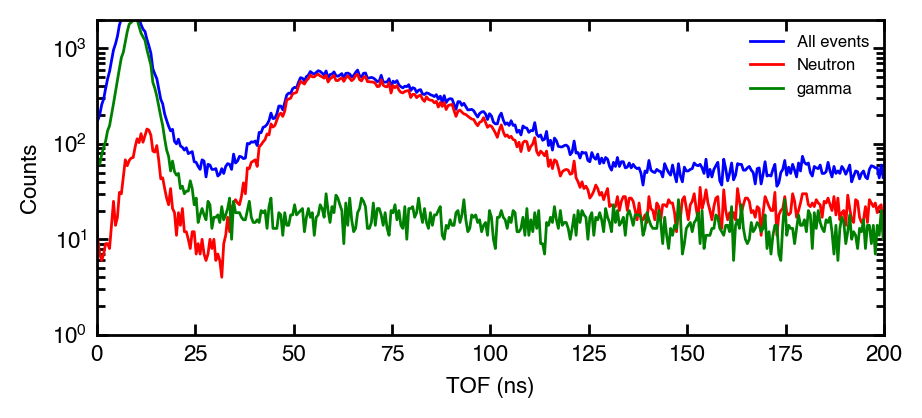

In [336]:
fig = fig_pre_def(10,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist,'b',linewidth=1,label ='All events')
plt.plot(bin_center,hist_neutron,'r' ,linewidth=1,label ='Neutron')
plt.plot(bin_center,hist_gamma,'g' ,linewidth=1,label ='gamma')
fig_post_def(xlim =(0,200),ylim = (1,2000),xlabel = 'TOF (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
plt.ylim(1,)
plt.yscale('log')

In [337]:
max_position = np.argmax(hist)
measured_gamma_time_diff= bin_center[max_position]
print('measured gamma different time: ',measured_gamma_time_diff,' ns')

measured gamma different time:  8.25  ns


In [338]:
light_speed = 299792468 #m/s
nano_second = 10**(-9)  #s
experimental_gamma_different= ((1.5+0.0254*1.5)/light_speed)/nano_second
print(experimental_gamma_different)

5.130549177106078


In [339]:
system_delay = measured_gamma_time_diff - experimental_gamma_different
print('system_delay  ',system_delay, '  ns')

system_delay   3.1194508228939224   ns


In [340]:
"""proT_data = pro_data.copy(deep=True)
proT_data['time_diff']-=system_delay
print(proT_data.head())"""

"proT_data = pro_data.copy(deep=True)\nproT_data['time_diff']-=system_delay\nprint(proT_data.head())"

In [341]:
proT_data = pro_data.copy(deep=True)
proT_data["TOF"] = proT_data["time_diff"].apply(lambda x:x-system_delay)
print(proT_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF
5      71.501  0.372385  0.147941      4.0  0.241858  2.42208   68.381549
6     190.922  0.333333  0.152274      4.0  0.315746  3.49566  187.802549
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880   51.723549
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086   78.475549
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124  105.569549


In [342]:
proT_data_all = pro_data_all.copy(deep=True)
proT_data_all["TOF"] = proT_data_all["time_diff"].apply(lambda x:x-system_delay)
print(proT_data_all.head())

   time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF
1   -312.124  0.182222  0.139275      4.0  0.343549  1.53294 -315.243451
2     12.063  0.291939  0.568242      4.0  0.241672  1.77596    8.943549
3     10.657  0.288641  0.332403      4.0  0.225651  0.60146    7.537549
4   -237.405  0.254545  0.408540      4.0  0.258065  0.41354 -240.524451
5     71.501  0.372385  0.147941      4.0  0.241858  2.42208   68.381549


# Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


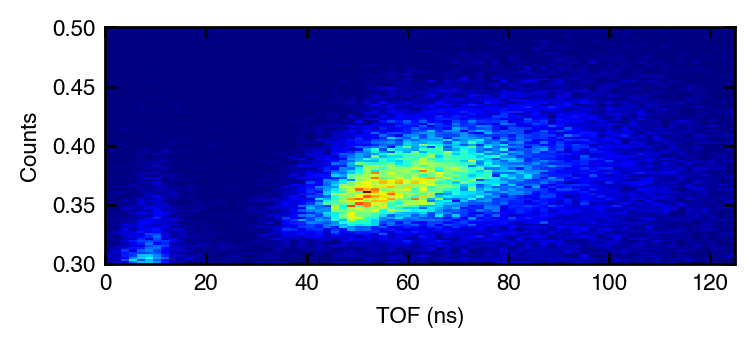

In [343]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data['TOF'],proT_data['Rec_PSD'], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

fig_post_def(xlim =(0,125),ylim = (0.3,0.5),xlabel = 'TOF (ns)',ylabel = 'Counts')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


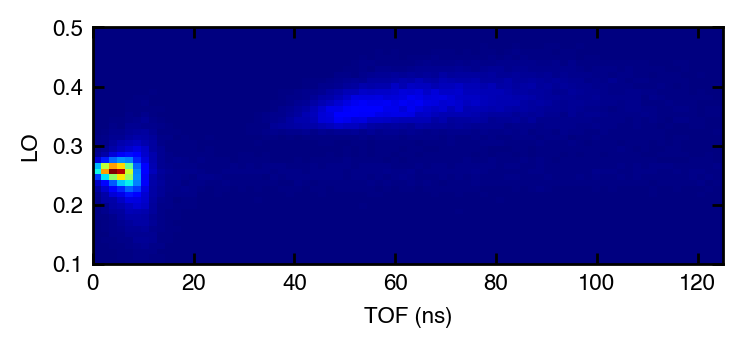

In [376]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data_all['TOF'],proT_data_all['Rec_PSD'], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

fig_post_def(xlim =(0,125),ylim = (0.1,0.5),xlabel = 'TOF (ns)',ylabel = 'LO')


# Time to energy

In [345]:
# Time to energy
def Time_to_energy(TOF):
    distance = 1.5+0.0254*1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy


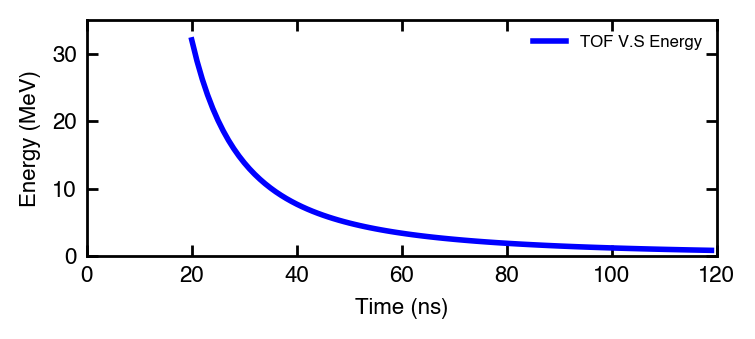

In [346]:
time_along= np.arange(20,120,1)
E_along = Time_to_energy(time_along)

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(time_along,E_along,'b',linewidth =2,label = 'TOF V.S Energy')

fig_post_def(xlim=(0,120),ylim=(0,35), xlabel ='Time (ns)',ylabel = 'Energy (MeV)')


In [347]:
resolution_time =0.01 #ns

proE_data = proT_data.copy()
proE_data['Rec_E'] = Time_to_energy(np.round(proE_data['TOF']/resolution_time)*resolution_time  )

print(proE_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
5      71.501  0.372385  0.147941      4.0  0.241858  2.42208   68.381549   
6     190.922  0.333333  0.152274      4.0  0.315746  3.49566  187.802549   
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880   51.723549   
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086   78.475549   
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124  105.569549   

       Rec_E  
5   2.615906  
6   0.345537  
10  4.587168  
15  1.983895  
16  1.094791  


# Trigger LO to proton energy 
apply for all but only suitable for Trigger PSD:0.3-0.5

In [348]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

In [349]:
enegy_range= np.arange(0,10,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  4.93395618e+00
  4.93401698e+00  4.93407777e+00]


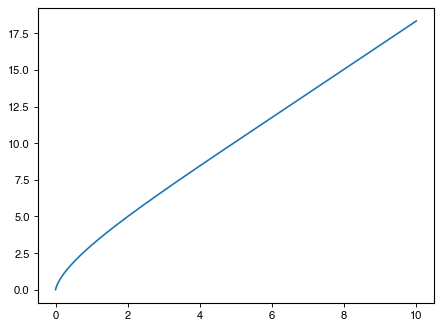

In [350]:
LO_range= np.arange(0,10,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

<Figure size 629.921x472.441 with 0 Axes>

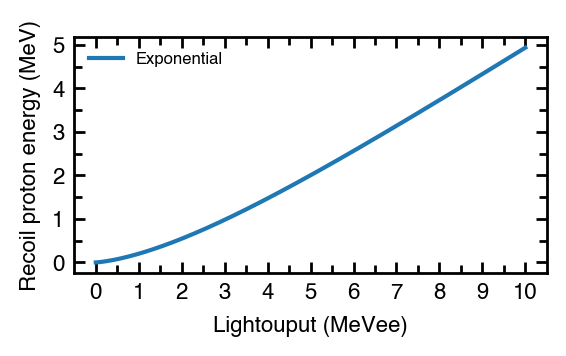

In [351]:
fig_pre_def()

fig = fig_pre_def(6,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 2, 1) 
ax.plot(enegy_range,lightoutput_2inches,label ='Exponential')
#ax.plot(P_Energy_inter,LO_range)
fig_post_def(xticks=(1,0.5),yticks=(1,0.5),xlabel ='Lightouput (MeVee)',ylabel = 'Recoil proton energy (MeV)')
#plt.yscale('log')
#ax2 =fig.add_subplot(1, 2, 2) 
#ax2.plot(LO_range,P_Energy_inter,label ='Exponential')




In [352]:
print(proE_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
5      71.501  0.372385  0.147941      4.0  0.241858  2.42208   68.381549   
6     190.922  0.333333  0.152274      4.0  0.315746  3.49566  187.802549   
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880   51.723549   
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086   78.475549   
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124  105.569549   

       Rec_E  
5   2.615906  
6   0.345537  
10  4.587168  
15  1.983895  
16  1.094791  


In [353]:
proEE_data = proE_data.copy()
proEE_data["Recoil_p_E"] = proEE_data["Tri_LO"].apply(lambda x:P_Energy_inter[int(x*100000)])
proEE_data["Total_E"] = proEE_data["Rec_E"]+proEE_data["Recoil_p_E"]

print(proEE_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
5      71.501  0.372385  0.147941      4.0  0.241858  2.42208   68.381549   
6     190.922  0.333333  0.152274      4.0  0.315746  3.49566  187.802549   
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880   51.723549   
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086   78.475549   
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124  105.569549   

       Rec_E  Recoil_p_E   Total_E  
5   2.615906    5.754004  8.369910  
6   0.345537    7.606314  7.951851  
10  4.587168    1.880184  6.467352  
15  1.983895    1.233810  3.217705  
16  1.094791    0.859570  1.954361  


In [498]:
rec_eff = np.loadtxt('20220211_efficiency.txt')
#scatter_eff=np.loadtxt("../Neutron_scatter_exp_simulation/TOF_effciency.txt")
scatter_eff=np.loadtxt("../Neutron_scatter_exp_simulation/TOF_effciency_threshold.txt")



<Figure size 629.921x472.441 with 0 Axes>

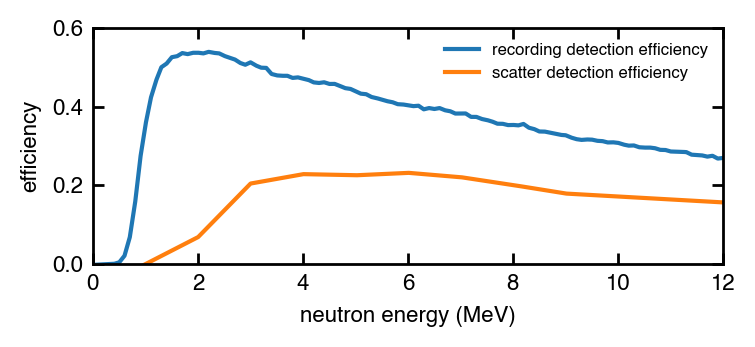

In [499]:
fig_pre_def()

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

interpoplation_axis= np.arange(0,20,0.001) # unit 0.0001 # times 10000

interpolation_func  = interp1d(rec_eff[:,0],rec_eff[:,1],fill_value="extrapolate") 
rec_eff_inter = interpolation_func(interpoplation_axis)

interpolation_func  = interp1d(scatter_eff[:,0],scatter_eff[:,1]/10000,fill_value="extrapolate") 
scatter_eff_inter = interpolation_func(interpoplation_axis)
plt.plot(interpoplation_axis,rec_eff_inter,'-',label = 'recording detection efficiency')
plt.plot(interpoplation_axis,scatter_eff_inter,'-',label = 'scatter detection efficiency')

fig_post_def(xlim=(0,12),ylim=(0,0.6),xlabel='neutron energy (MeV)',ylabel='efficiency')

# Neutron scatter: set time window and trigger PSD 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


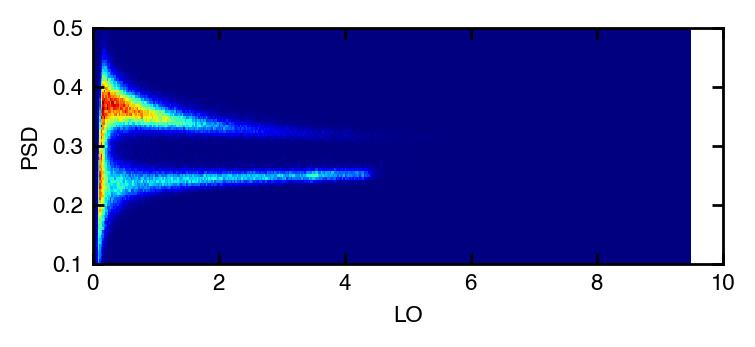

In [500]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data_all['Tri_LO'],proT_data_all['Tri_PSD'], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

fig_post_def(xlim =(0,10),ylim = (0.1,0.5),xlabel = 'LO',ylabel = 'PSD')


In [501]:
mask_TOF_upper  = proEE_data['TOF'] < 125
mask_TOF_lower  = proEE_data['TOF'] > 30
mask_Tri_n_PSD_upper  = proEE_data['Tri_PSD'] < 0.5
mask_Tri_n_PSD_lower  = proEE_data['Tri_PSD'] > 0.3
mask_TotalE_upper  = proEE_data['Total_E'] < 13
proEEW_data = proEE_data[(mask_TOF_upper 
                        & mask_TOF_lower 
                        & mask_TotalE_upper
                        & mask_Tri_n_PSD_lower
                        & mask_Tri_n_PSD_upper)]
print(proEEW_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880   51.723549   
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086   78.475549   
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124  105.569549   
17     58.282  0.367484  1.286901      4.0  0.390533  0.29406   55.162549   
30     99.561  0.325301  0.256885      4.0  0.322684  0.18154   96.441549   

       Rec_E  Recoil_p_E   Total_E  
10  4.587168    1.880184  6.467352  
15  1.983895    1.233810  3.217705  
16  1.094791    0.859570  1.954361  
17  4.029235    1.306000  5.335235  
30  1.312353    0.934038  2.246391  


In [502]:
proEEWeff_data = proEEW_data.copy()

proEEWeff_data["Rec_eff"]     = proEEW_data["Rec_E"].apply(lambda x:rec_eff_inter[int(x*1000)])
proEEWeff_data["scatter_eff"] = proEEW_data["Total_E"].apply(lambda x:scatter_eff_inter[int(x*1000)])
print(proEEWeff_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880   51.723549   
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086   78.475549   
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124  105.569549   
17     58.282  0.367484  1.286901      4.0  0.390533  0.29406   55.162549   
30     99.561  0.325301  0.256885      4.0  0.322684  0.18154   96.441549   

       Rec_E  Recoil_p_E   Total_E   Rec_eff  scatter_eff  
10  4.587168    1.880184  6.467352  0.458078     0.226963  
15  1.983895    1.233810  3.217705  0.537120     0.209908  
16  1.094791    0.859570  1.954361  0.417168     0.065158  
17  4.029235    1.306000  5.335235  0.470474     0.227844  
30  1.312353    0.934038  2.246391  0.501049     0.101854  


In [503]:
ISO_spectrum = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2015.txt')

(0.05, 0.25)

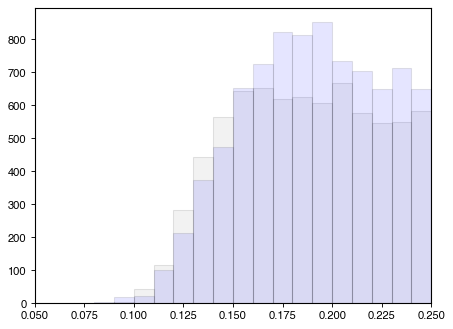

In [504]:
y_tri = plt.hist(proEEWeff_data['Tri_LO'],1000,range=(0,10),color="gray",alpha=0.1,edgecolor = "k")
y_rec = plt.hist(proEEWeff_data['Rec_LO'],1000,range=(0,10),color="blue",alpha=0.1,edgecolor = "k")
plt.xlim(0.05,0.25)

In [505]:
mask_rec_threshold = proEEWeff_data["Rec_LO"]>0.1
mask_tri_threshold = proEEWeff_data["Tri_LO"]>0.1
proEEWeffTh_data = proEEWeff_data[(mask_rec_threshold&mask_tri_threshold)]

In [506]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    proEEWeffTh_data['Total_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)

<Figure size 629.921x472.441 with 0 Axes>

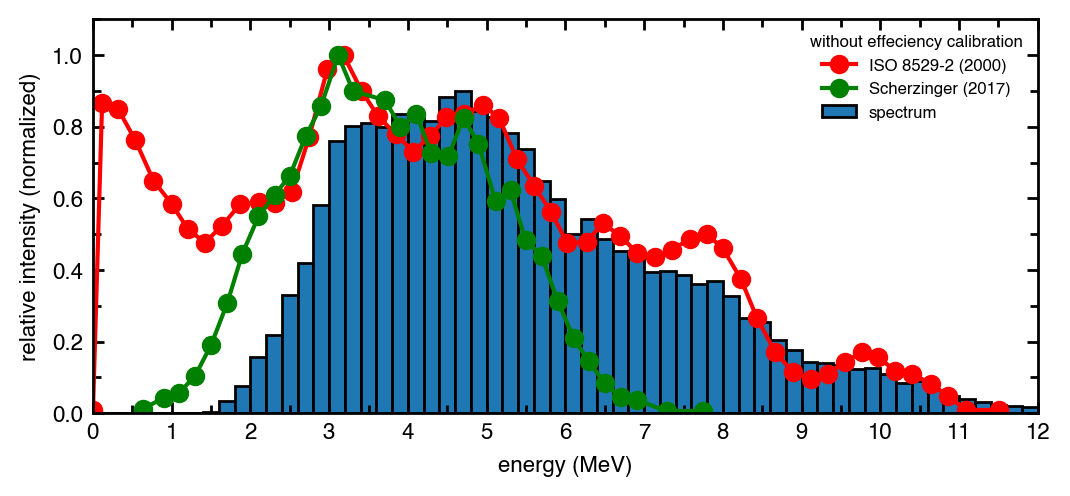

In [507]:


fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, 0.9*Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




In [508]:
output_N_scatter = Neutron_E_axis[:,np.newaxis]
output_N_scatter = np.column_stack((output_N_scatter,Neutron_E_y[:,np.newaxis]))
np.savetxt("N_scatter_20221113.txt",output_N_scatter)

In [509]:
print(proEEWeffTh_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880   51.723549   
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086   78.475549   
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124  105.569549   
17     58.282  0.367484  1.286901      4.0  0.390533  0.29406   55.162549   
30     99.561  0.325301  0.256885      4.0  0.322684  0.18154   96.441549   

       Rec_E  Recoil_p_E   Total_E   Rec_eff  scatter_eff  
10  4.587168    1.880184  6.467352  0.458078     0.226963  
15  1.983895    1.233810  3.217705  0.537120     0.209908  
16  1.094791    0.859570  1.954361  0.417168     0.065158  
17  4.029235    1.306000  5.335235  0.470474     0.227844  
30  1.312353    0.934038  2.246391  0.501049     0.101854  


In [510]:
bin_width=0.2
spectrum_x = np.arange(0,20,bin_width)
spectrum_hist = np.zeros(len(spectrum_x))

In [511]:
print(proEEWeffTh_data.iloc[[0],[3]].values)
print(len(proEEWeffTh_data['Total_E']))

[[4.]]
33557


In [512]:
spectrum_hist = np.zeros(len(spectrum_x))
for i in np.arange(0,len(proEEWeffTh_data['Total_E']),1):
    if ((proEEWeffTh_data.iloc[[i],[10]].values > 0) and (proEEWeffTh_data.iloc[[i],[11]].values >0)):
        spectrum_hist[int(np.round((proEEWeffTh_data.iloc[[i],[9]].values*(bin_width**-1)),0))] += (proEEWeffTh_data.iloc[[i],[10]].values*proEEWeffTh_data.iloc[[i],[11]].values)**-1


Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

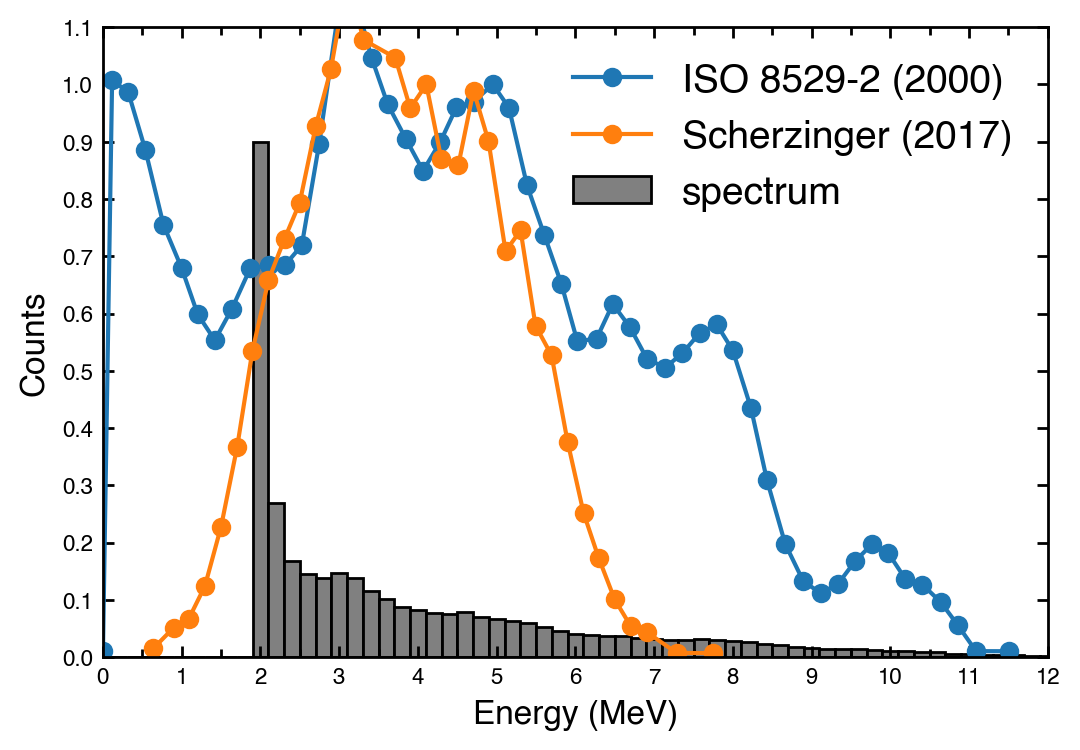

In [ ]:

fig_pre_def()

fig = fig_pre_def(12,8) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

#plt.plot(spectrum_x,1*spectrum_hist/spectrum_hist.max(),'o-')
ax.bar(0+spectrum_x, 0.9*spectrum_hist/spectrum_hist.max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[20:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[15:,1].max(),'o-',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')



fig_post_def(xlim=(0,12),ylim=(0,1.1),lg_fs=14,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



# gamma trigger

In [379]:
mask_TOF_upper  = proEE_data['TOF'] < 125
mask_TOF_lower  = proEE_data['TOF'] > 30
mask_Tri_g_PSD_upper  = proEE_data['Tri_PSD'] < 0.3
mask_Tri_g_PSD_lower  = proEE_data['Tri_PSD'] > 0.0
mask_TotalE_upper  = proEE_data['Total_E'] < 13
pro_g_data = proEE_data[(mask_TOF_upper 
                        & mask_TOF_lower 
                        & mask_TotalE_upper
                        & mask_Tri_g_PSD_upper
                        & mask_Tri_g_PSD_lower)]
print(pro_g_data.head())

     time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO        TOF  \
5       71.501  0.372385  0.147941      4.0  0.241858  2.42208  68.381549   
20      56.999  0.337968  1.602591      4.0  0.238971  0.63104  53.879549   
57      69.093  0.370920  0.208603      4.0  0.259279  2.20342  65.973549   
70      53.625  0.388858  1.111105      4.0  0.255725  0.15196  50.505549   
100     76.812  0.359712  0.602287      4.0  0.286319  0.82244  73.692549   

        Rec_E  Recoil_p_E   Total_E  
5    2.615906    5.754004  8.369910  
20   4.224278    2.211294  6.435572  
57   2.811412    5.363795  8.175207  
70   4.811315    0.824504  5.635819  
100  2.251165    2.656679  4.907843  


In [451]:
def g_Time_to_energy(TOF):
    distance = 1.52+0.0254*1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy


In [452]:
light_speed = 299792468 #m/s
nano_second = 10**(-9)  #s
gamma_to_trigger= ((0.0254)/light_speed)/nano_second
print(gamma_to_trigger)

0.08472527735419957


In [453]:
pro_g_TE_data = pro_g_data.copy(deep=True)
pro_g_TE_data["g_TOF"] = pro_g_data["TOF"].apply(lambda x:x+gamma_to_trigger)
pro_g_TE_data['g_E'] = g_Time_to_energy(np.round(pro_g_TE_data['g_TOF']/resolution_time)*resolution_time  )
print(pro_g_TE_data.head())

     time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO        TOF  \
5       71.501  0.372385  0.147941      4.0  0.241858  2.42208  68.381549   
20      56.999  0.337968  1.602591      4.0  0.238971  0.63104  53.879549   
57      69.093  0.370920  0.208603      4.0  0.259279  2.20342  65.973549   
70      53.625  0.388858  1.111105      4.0  0.255725  0.15196  50.505549   
100     76.812  0.359712  0.602287      4.0  0.286319  0.82244  73.692549   

        Rec_E  Recoil_p_E   Total_E      g_TOF       g_E  
5    2.615906    5.754004  8.369910  68.466274  2.677592  
20   4.224278    2.211294  6.435572  53.964274  4.322691  
57   2.811412    5.363795  8.175207  66.058274  2.877453  
70   4.811315    0.824504  5.635819  50.590274  4.922532  
100  2.251165    2.656679  4.907843  73.777274  2.304656  


In [454]:
pro_geff_data = pro_g_TE_data.copy()

pro_geff_data["Rec_eff"]     = pro_g_data["Rec_E"].apply(lambda x:rec_eff_inter[int(x*1000)])
pro_geff_data["scatter_eff"] = pro_g_data["Total_E"].apply(lambda x:scatter_eff_inter[int(x*1000)])
print(pro_geff_data.head())

     time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO        TOF  \
5       71.501  0.372385  0.147941      4.0  0.241858  2.42208  68.381549   
20      56.999  0.337968  1.602591      4.0  0.238971  0.63104  53.879549   
57      69.093  0.370920  0.208603      4.0  0.259279  2.20342  65.973549   
70      53.625  0.388858  1.111105      4.0  0.255725  0.15196  50.505549   
100     76.812  0.359712  0.602287      4.0  0.286319  0.82244  73.692549   

        Rec_E  Recoil_p_E   Total_E      g_TOF       g_E   Rec_eff  \
5    2.615906    5.754004  8.369910  68.466274  2.677592  0.523940   
20   4.224278    2.211294  6.435572  53.964274  4.322691  0.461407   
57   2.811412    5.363795  8.175207  66.058274  2.877453  0.510796   
70   4.811315    0.824504  5.635819  50.590274  4.922532  0.447012   
100  2.251165    2.656679  4.907843  73.777274  2.304656  0.538007   

     scatter_eff  
5       0.287121  
20      0.356728  
57      0.294260  
70      0.378805  
100     0.400008  


In [455]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    pro_geff_data['Rec_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)

<Figure size 629.921x472.441 with 0 Axes>

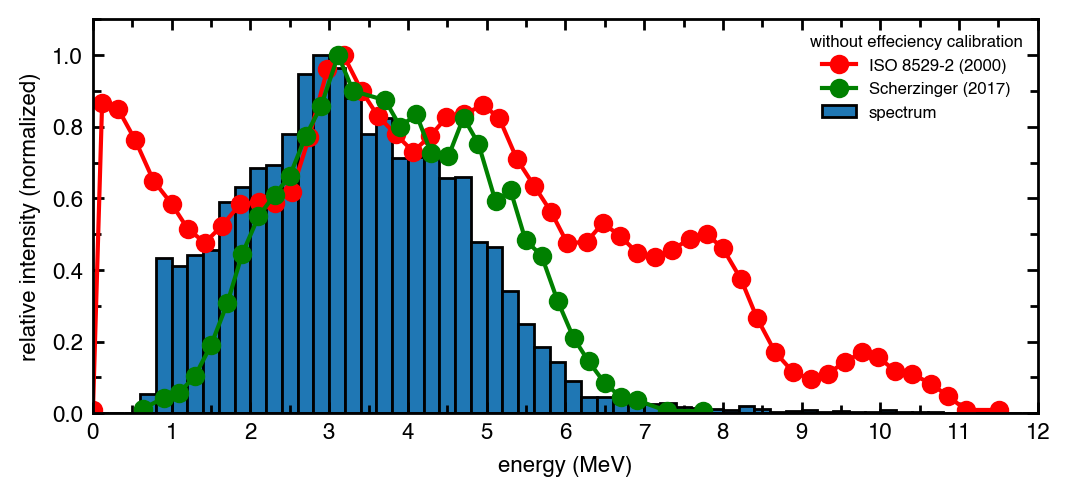

In [456]:


fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




In [457]:
print(pro_geff_data.head())

     time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO        TOF  \
5       71.501  0.372385  0.147941      4.0  0.241858  2.42208  68.381549   
20      56.999  0.337968  1.602591      4.0  0.238971  0.63104  53.879549   
57      69.093  0.370920  0.208603      4.0  0.259279  2.20342  65.973549   
70      53.625  0.388858  1.111105      4.0  0.255725  0.15196  50.505549   
100     76.812  0.359712  0.602287      4.0  0.286319  0.82244  73.692549   

        Rec_E  Recoil_p_E   Total_E      g_TOF       g_E   Rec_eff  \
5    2.615906    5.754004  8.369910  68.466274  2.677592  0.523940   
20   4.224278    2.211294  6.435572  53.964274  4.322691  0.461407   
57   2.811412    5.363795  8.175207  66.058274  2.877453  0.510796   
70   4.811315    0.824504  5.635819  50.590274  4.922532  0.447012   
100  2.251165    2.656679  4.907843  73.777274  2.304656  0.538007   

     scatter_eff  
5       0.287121  
20      0.356728  
57      0.294260  
70      0.378805  
100     0.400008  


In [458]:
bin_width=0.2
spectrum_x_g = np.arange(0,20,bin_width)
spectrum_hist_g = np.zeros(len(spectrum_x_g))

In [459]:
spectrum_hist_g = np.zeros(len(spectrum_x_g))
for i in np.arange(0,len(pro_geff_data['g_E']),1):
    #print(proEEWeffTh_data.iloc[[i],[9]])
    #print(proEEWeffTh_data.iloc[[i],[10]])
    #print(proEEWeffTh_data.iloc[[i],[11]])
    spectrum_hist_g[int(np.round((pro_geff_data.iloc[[i],[11]].values*(bin_width**-1)),0))] += (pro_geff_data.iloc[[i],[12]].values)**-1


Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

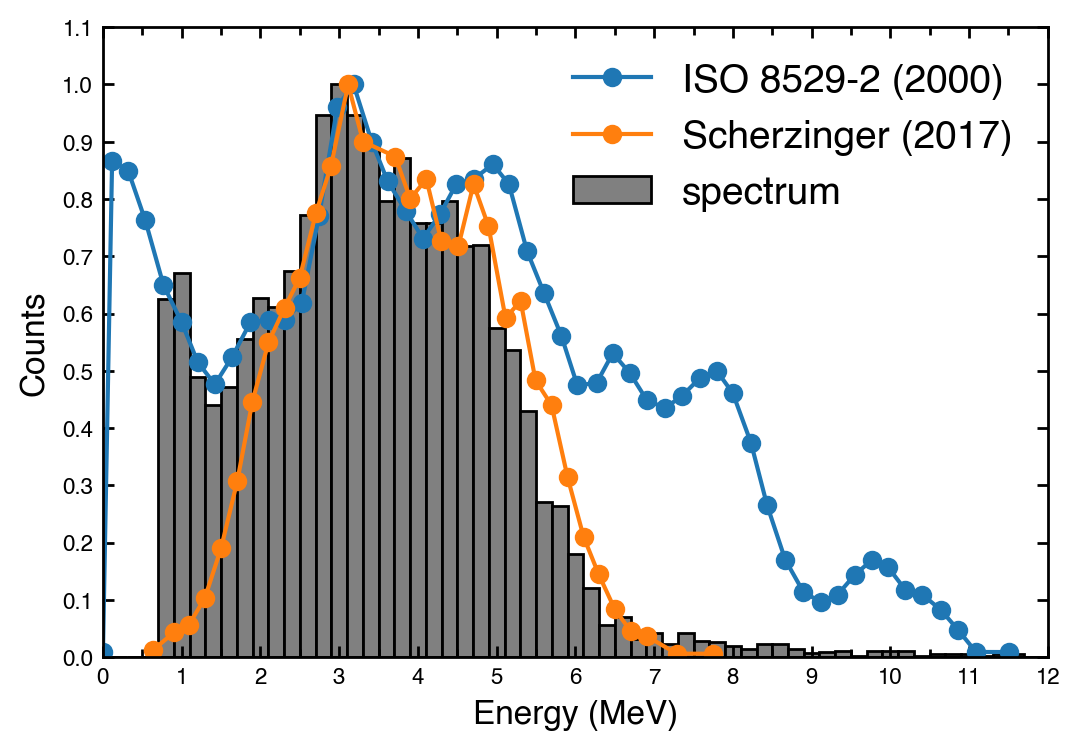

In [460]:

fig_pre_def()

fig = fig_pre_def(12,8) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

#plt.plot(spectrum_x,1*spectrum_hist/spectrum_hist.max(),'o-')
ax.bar(0+spectrum_x_g, 1.0*spectrum_hist_g/spectrum_hist_g.max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[0:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')
fig_post_def(xlim=(0,12),ylim=(0,1.1),lg_fs=14,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



In [461]:
output_g_trigger = spectrum_x_g[:,np.newaxis]
output_g_trigger = np.column_stack((output_g_trigger,spectrum_hist_g[:,np.newaxis]))
np.savetxt("g_trigger_20221113.txt",output_g_trigger)

In [ ]:
recoil_proton_E = []
N_Eth_PE=[]
for i in np.arange(0,len(neutron_E_threshold_selected[:,4]),1):
    index = int(neutron_E_threshold_selected[i,4]*100000)
    #print(neutron_E_threshold_selected[i,4],' ',index,' ',lightoutput_2inches_inter[index])
    N_Eth_PE_temp = np.append(neutron_E_threshold_selected[i,:],P_Energy_inter[index])
    
    if i ==0:
        N_Eth_PE = N_Eth_PE_temp.copy()
    else:
        N_Eth_PE = np.vstack((N_Eth_PE,N_Eth_PE_temp))
print('Energy/      PSD/       LO/        Channel/   LO@Trigger/porton deposited in trigger detector')
print(N_Eth_PE)

## Time difference V.S. PSD

In [32]:
fig_pre_def()

plt.hist2d(singal_processed[:,0],singal_processed[:,1], bins=(400, 100),cmin=0, cmap=plt.cm.jet)
#ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
#ax.set_ylabel('PSD ',fontsize=18)
#fig_post_def( xlim = (-50,150),ylim=(0,0.45),xlabel='Time diff(ns)', ylabel = 'PSD')
#fig_post_def()
plt.ylim(0.0,0.45)
plt.xlim(-20,200)


NameError: name 'singal_processed' is not defined

<Figure size 629.921x472.441 with 0 Axes>

<Figure size 629.921x472.441 with 0 Axes>

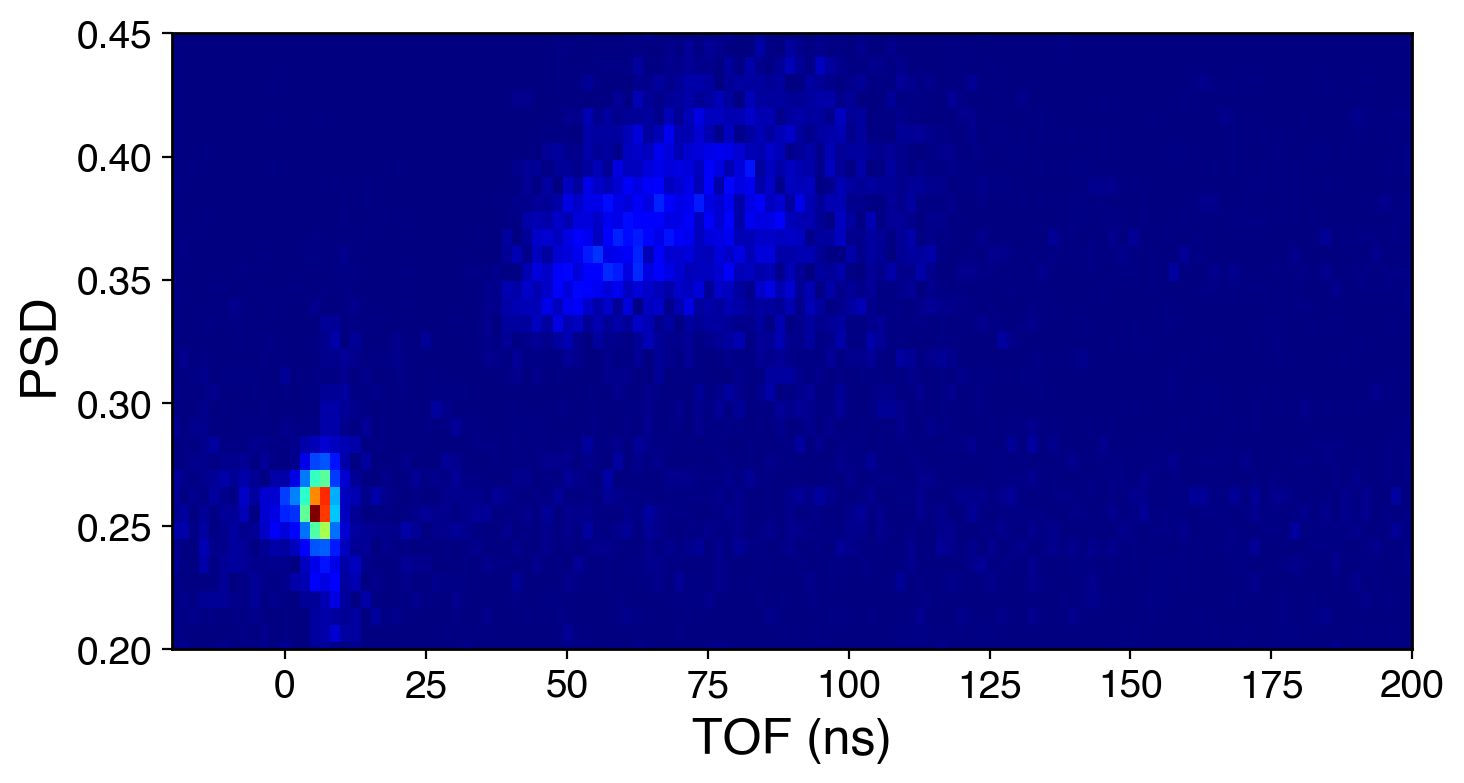

In [2740]:
fig_pre_def()
fig = plt.figure(figsize=(8,4))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.hist2d(singal_processed[:,0], singal_processed[:,1], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_ylabel('PSD ',fontsize=18)

plt.ylim(0.2,0.45)
plt.xlim(-20,200)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


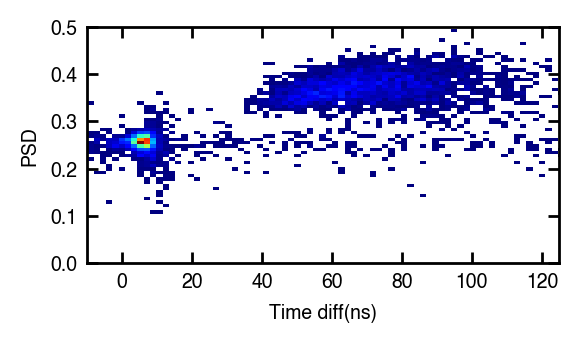

In [2741]:

fig = fig_pre_def(6,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


ax.hist2d(singal_processed[:,0], singal_processed[:,1], bins=(400, 100),cmin=2, cmap=plt.cm.jet)
fig_post_def(xlim=(-10,125),ylim=(0,0.5),lb_fs=7,xlabel='Time diff(ns)', ylabel = 'PSD')
#ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
#ax.set_ylabel('PSD ',fontsize=18)

#plt.ylim(0.2,0.45)
#plt.xlim(-20,200)

plt.show()

## Time V.S Channel

(-10.0, 110.0)

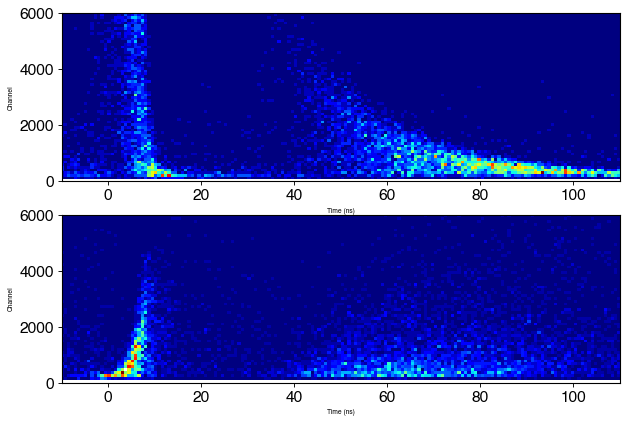

In [2742]:


fig = plt.figure(figsize=(9,6))        # 圖片大小
ax = fig.add_subplot(2, 1, 1)          # 產生1x1格圖片、在第一格

plt.hist2d(singal_processed[:,0],singal_processed[:,2], bins=(1000, 100),cmin=0,cmax=30, cmap=plt.cm.jet)

ax.set_ylabel('Channel',fontsize=6) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Time (ns)',fontsize=6)
plt.ylim(0,6000)
plt.xlim(-10,110)

ax2 = fig.add_subplot(2, 1, 2)          # 產生1x1格圖片、在第一格

ax2.hist2d(singal_processed[:,0],singal_processed[:,4], bins=(1000, 100),cmin=0,cmax=30, cmap=plt.cm.jet)
ax2.set_ylabel('Channel',fontsize=6) # labelpad=10 與座標軸間的距離
ax2.set_xlabel('Time (ns)',fontsize=6)
plt.ylim(0,6000)
plt.xlim(-10,110)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


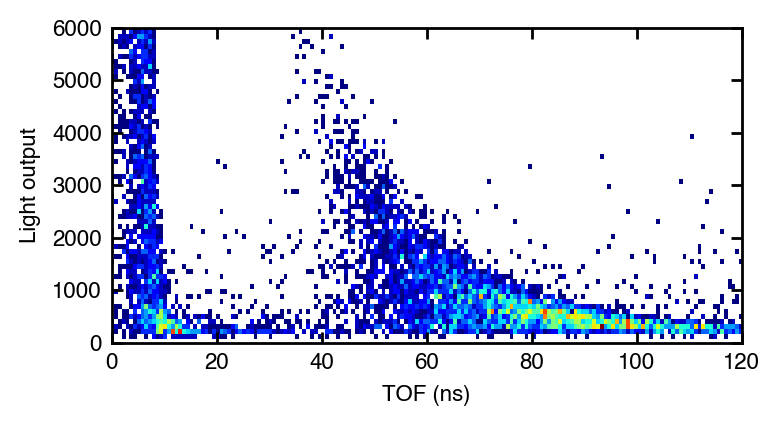

In [2743]:
fig = fig_pre_def(8,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)   

plt.hist2d(singal_processed[:,0],singal_processed[:,2], bins=(1000, 100),cmin=1,cmax=30, cmap=plt.cm.jet)

#ax.set_ylabel('Channel',fontsize=12) # labelpad=10 與座標軸間的距離
#ax.set_xlabel('Time (ns)',fontsize=12)
#plt.ylim(0,6000)
#plt.xlim(0,110)
#plt.show()
fig_post_def(xlim =(0,120),ylim = (0,6000),xlabel = 'TOF (ns)',ylabel = 'Light output')

## Channel V.S PSD

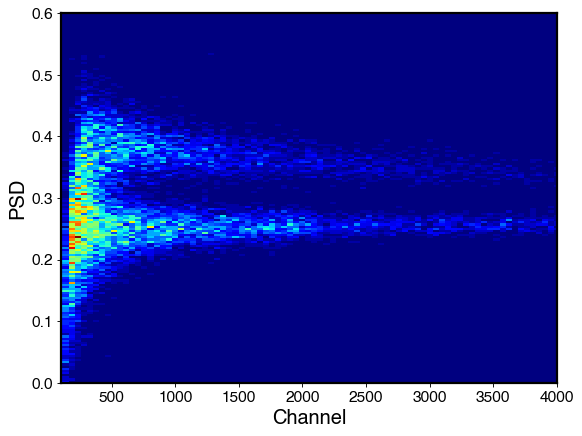

In [2744]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.hist2d(singal_processed[:,2],singal_processed[:,1], bins=(200, 200),cmin=0, cmap=plt.cm.jet)

ax.set_ylabel('PSD',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Channel',fontsize=18)
plt.ylim(0.,0.6)
plt.xlim(100,4000)
plt.show()

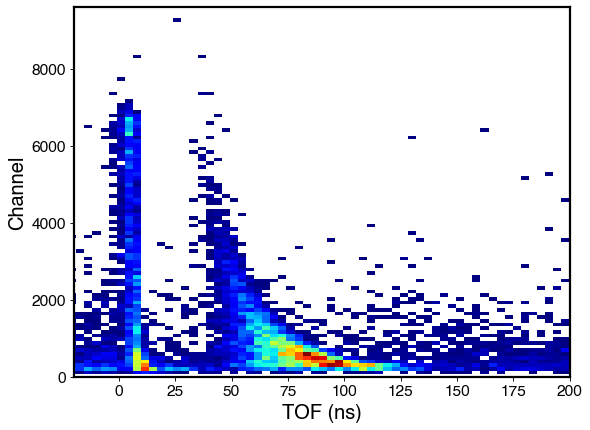

In [2745]:
plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

h=plt.hist2d(singal_processed[:,0],singal_processed[:,2], bins=(200, 100),cmin=1, cmap=plt.cm.jet)

ax.set_ylabel('Channel',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('TOF (ns)',fontsize=18)
plt.ylim(0,)
plt.xlim(-20,200)
plt.show()

h= plt.hist2d(x_2D, y_2D, bins=(200, 50),cmin=1, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

plt.rc('font', family='Helvetica')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(125,140,2):
    ax.plot(h[0][int(i)],label = str(i*4-400)+'ns' )

    
ax.set_ylabel('Counts',fontsize=18) # labelpad=10 與座標軸間的距離
ax.set_xlabel('Channel',fontsize=18)
plt.ylim(0,100)
plt.xlim(0,50)
plt.legend(fontsize = 18) 
plt.show()
 

In [49]:
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[1 3 2 0 0 0 0 0 0 0]


ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

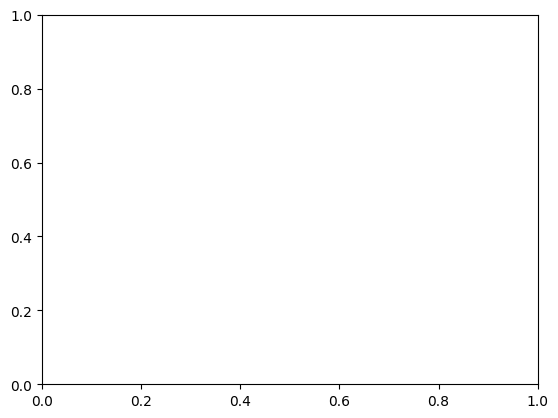

In [57]:
hist, edges = np.histogram(test_data,bins=10,range=(0,10))
print(edges)
print(hist)
plt.plot(edges, hist,'x')

[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
[1 3 2 0 0 0 0 0 0 0]


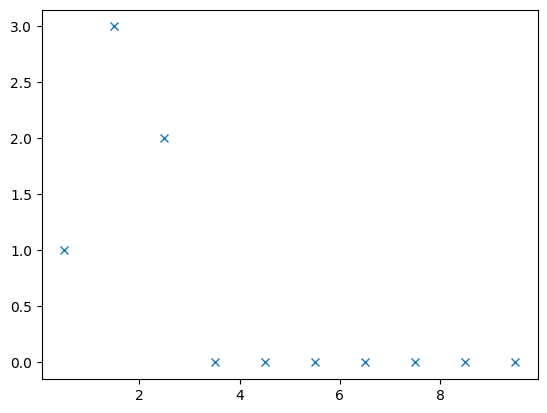

In [53]:
test_data=[0,1,1.2,1.6,2.2,2.6]
bin_center, hist  = sorting(test_data,10,0,10)
print(bin_center)
print(hist)
plt.plot(bin_center, hist,'x')

In [3086]:
bin_center, hist  = sorting(singal_processed[:,0],800,-400,400)
bin_center, hist_neutron = sorting(neutron_PSD[:,0],800,-400,400)

<Figure size 629.921x472.441 with 0 Axes>

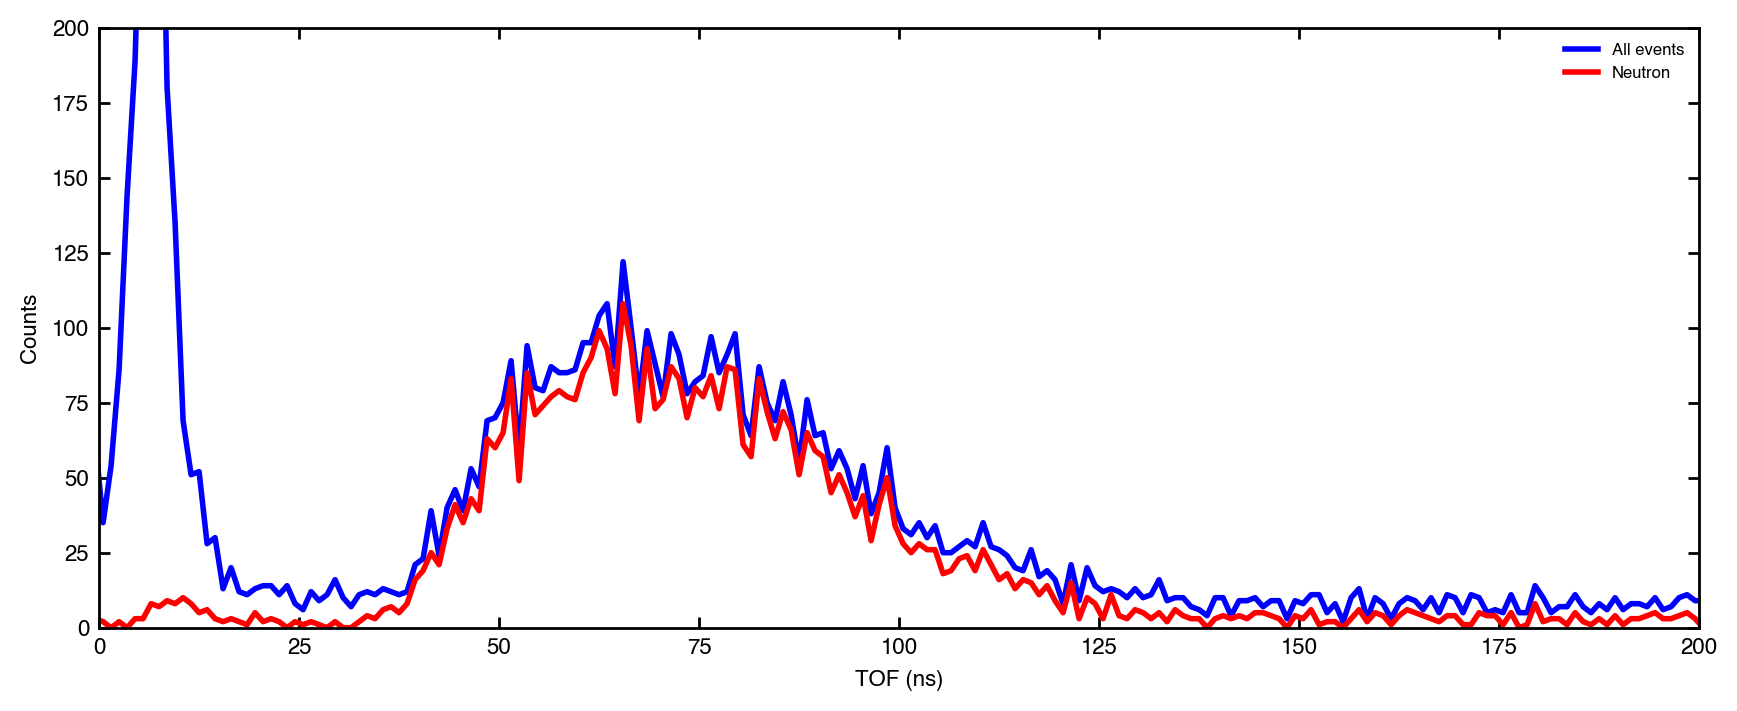

In [3087]:
fig_pre_def()

fig = plt.figure(figsize=(8,3))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

ax.plot(bin_center,hist,'b',linewidth=2,label ='All events')
ax.plot(bin_center,hist_neutron,'r' ,linewidth=2,label ='Neutron')

fig_post_def(xlim =(0,200),ylim = (0,200),xlabel = 'TOF (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
#plt.ylim(0,)

# Time delay calibration

## Find the measure coincidence time 

In [3088]:
max_position = np.argmax(hist)
measured_gamma_time_diff= bin_center[max_position]
print('measured gamma different time: ',measured_gamma_time_diff,' ns')

measured gamma different time:  7.5  ns


In [3089]:
light_speed = 299792468 #m/s
nano_second = 10**(-9)  #s
experimental_gamma_different= ((1.5+0.0254*1.5-0.0254)/light_speed)/nano_second
print(experimental_gamma_different)

5.045823899751877


In [3090]:
system_delay = measured_gamma_time_diff - experimental_gamma_different
print('system_delay  ',system_delay, '  ns')

system_delay   2.454176100248123   ns


In [3091]:
"""gamma_to_150cm_enutron_detector = (1.47 / 299792458 )*10**9
print(gamma_to_150cm_enutron_detector,' ns')
ideal_gamma_coincidence = gamma_to_150cm_enutron_detector - gamma_to_3_cm_gamma_detector
system_delay = measured_gamma_coincidence - ideal_gamma_coincidence
print('system_delay  ',system_delay)
"""

"gamma_to_150cm_enutron_detector = (1.47 / 299792458 )*10**9\nprint(gamma_to_150cm_enutron_detector,' ns')\nideal_gamma_coincidence = gamma_to_150cm_enutron_detector - gamma_to_3_cm_gamma_detector\nsystem_delay = measured_gamma_coincidence - ideal_gamma_coincidence\nprint('system_delay  ',system_delay)\n"

In [3092]:
#system_delay =2.66


## Time Correction

In [3093]:
Signal_processed_corrected = singal_processed.copy()
Signal_processed_corrected[:,0] = Signal_processed_corrected[:,0]-system_delay#+gamma_to_3_cm_gamma_detector

neutron_PSD_Tdelay_corrected = neutron_PSD.copy()
neutron_PSD_Tdelay_corrected[:,0] = neutron_PSD_Tdelay_corrected[:,0]-system_delay#+gamma_to_3_cm_gamma_detector

In [3094]:
print('Time    |      PSD      |   channal  | source detector source detectot channel |  Channel at trigger ')
print(neutron_PSD_Tdelay_corrected)


Time    |      PSD      |   channal  | source detector source detectot channel |  Channel at trigger 
[[7.91408239e+01 3.42377000e-01 7.74000000e+02 4.00000000e+00
  4.67000000e+02]
 [6.59198239e+01 3.17992000e-01 2.39000000e+02 4.00000000e+00
  3.07000000e+02]
 [9.16398239e+01 4.35829000e-01 3.74000000e+02 4.00000000e+00
  7.69000000e+02]
 ...
 [8.18658239e+01 3.46512000e-01 4.30000000e+02 4.00000000e+00
  4.45000000e+02]
 [8.69858239e+01 3.52239000e-01 3.35000000e+02 4.00000000e+00
  2.19000000e+02]
 [7.50018239e+01 3.92000000e-01 3.75000000e+02 4.00000000e+00
  1.30000000e+03]]


#time resolution


## TOF distribution (Just for display)

In [3095]:
#axis, hist_corr  = sorting(singal_processed[:,0]-system_delay+gamma_to_3_cm_gamma_detector,400,-400,400)
#axis, hist_neutron_corr = sorting(neutron_PSD[:,0]-system_delay+gamma_to_3_cm_gamma_detector,400,-400,400)
axis, hist_corr  = sorting(Signal_processed_corrected[:,0],800,-400,400)
axis, hist_neutron_corr = sorting(neutron_PSD_Tdelay_corrected[:,0],800,-400,400)

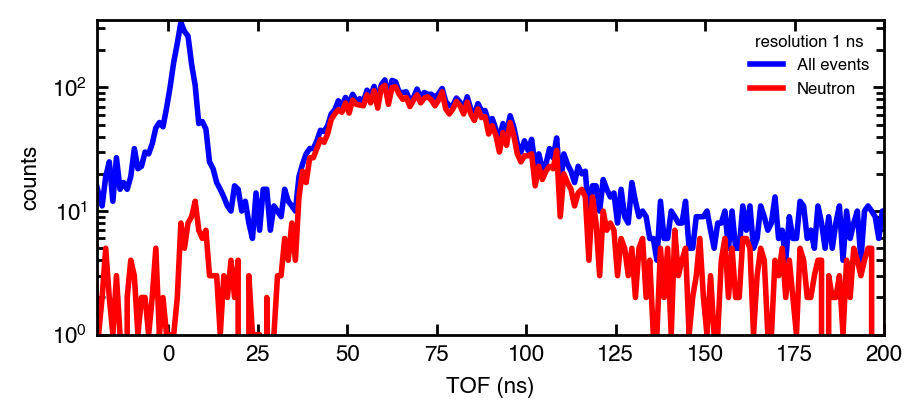

In [3096]:
fig = fig_pre_def(10,4) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#ax.plot([],[],' ',label='1 ns')
ax.plot(axis, hist_corr  ,'b',linewidth=2,label ='All events')
ax.plot(axis, hist_neutron_corr,'r' ,linewidth=2,label ='Neutron')


#fig_post_def(xlim=(-20,150),ylim=(0,700),x_ma =20 ,x_mi = 10, ylabel ='counts' ,xlabel='TOF (ns)')
fig_post_def(ylabel ='counts' ,xlabel='TOF (ns)',title='resolution 1 ns')
plt.xlim(-20,200)
plt.ylim(1,)
plt.yscale('log')

# correction: Channel to MeVee 

In [3097]:
print(neutron_PSD_Tdelay_corrected[0,:])

[7.91408239e+01 3.42377000e-01 7.74000000e+02 4.00000000e+00
 4.67000000e+02]


In [3098]:
ChannelToLightoutput = 0.000619
ChannelToLightoutput_trigger = 0.000580
neutron_PSD_Tdelay_LO_corrected = neutron_PSD_Tdelay_corrected.copy()
neutron_PSD_Tdelay_LO_corrected[:,2] = neutron_PSD_Tdelay_LO_corrected[:,2]*ChannelToLightoutput
neutron_PSD_Tdelay_LO_corrected[:,4] = neutron_PSD_Tdelay_LO_corrected[:,4]*ChannelToLightoutput_trigger



In [3099]:
print(neutron_PSD_Tdelay_LO_corrected)


[[79.1408239  0.342377   0.479106   4.         0.27086  ]
 [65.9198239  0.317992   0.147941   4.         0.17806  ]
 [91.6398239  0.435829   0.231506   4.         0.44602  ]
 ...
 [81.8658239  0.346512   0.26617    4.         0.2581   ]
 [86.9858239  0.352239   0.207365   4.         0.12702  ]
 [75.0018239  0.392      0.232125   4.         0.754    ]]


# Spectrum calculation

## Choose the time region and threshold

In [3238]:
neutron_time_threshold_selected = [0,0,0,0,0]
selected_time_region = [30,130]
threshold = 0 #MeVee

for i in np.arange(0,len(neutron_PSD_Tdelay_corrected[:,0]),1):
    if (    neutron_PSD_Tdelay_LO_corrected[i,0] > selected_time_region[0] 
        and neutron_PSD_Tdelay_LO_corrected[i,0] < selected_time_region[1] 
        and neutron_PSD_Tdelay_LO_corrected[i,2] > threshold):
        neutron_time_threshold_selected = np.vstack((neutron_time_threshold_selected,neutron_PSD_Tdelay_LO_corrected[i,:]))
        
neutron_time_threshold_selected =neutron_time_threshold_selected[1:]
    

In [3239]:
print(neutron_time_threshold_selected)
print(len(neutron_time_threshold_selected[:,0]))

[[79.1408239  0.342377   0.479106   4.         0.27086  ]
 [65.9198239  0.317992   0.147941   4.         0.17806  ]
 [91.6398239  0.435829   0.231506   4.         0.44602  ]
 ...
 [81.8658239  0.346512   0.26617    4.         0.2581   ]
 [86.9858239  0.352239   0.207365   4.         0.12702  ]
 [75.0018239  0.392      0.232125   4.         0.754    ]]
4410


## correction: time to energy

In [3240]:
# Time to energy
def Time_to_energy(TOF):
    distance = 1.5+0.0254*1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy


In [3241]:
# Time to energy
def Time_to_energy_wo_realitistic(TOF):
    distance = 1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            neutron_energy = 0.5*neutron_mass*(distance/TOF*(10**9))**2*(1.6*10**-19)**-1*(10**-6)

            return neutron_energy
    else:
        neutron_energy = 0.5*neutron_mass*(distance/TOF*(10**9))**2*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy



In [3242]:
def TimeCost_with_D_E(d,E):
    # Unit of d is m (meter), Unit of E is MeV 
    neutron_mass = 1.64749*10**-27 #kg
    v=(2*E*(1.6*10**-19)*(10**6)/neutron_mass)**0.5
    flight_time = (d/v)*10**9
    return flight_time


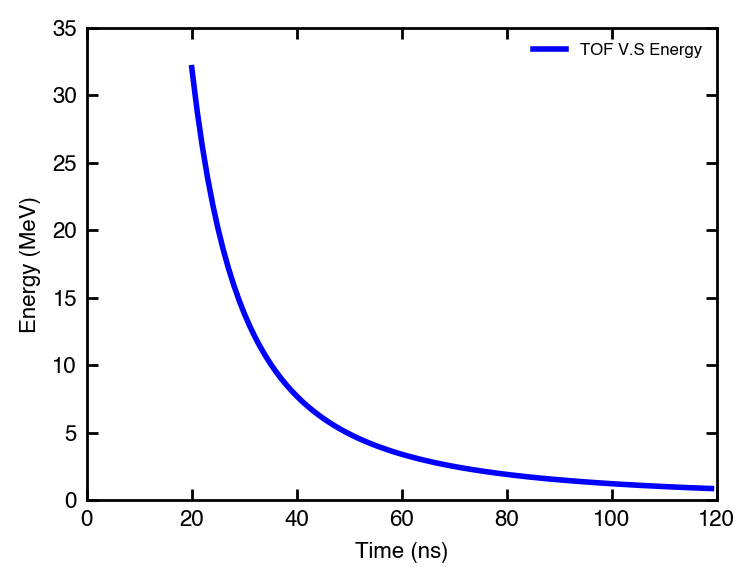

In [3243]:
time_along= np.arange(20,120,1)
E_along = Time_to_energy(time_along)

fig = fig_pre_def() # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(time_along,E_along,'b',linewidth =2,label = 'TOF V.S Energy')

fig_post_def(xlim=(0,120),ylim=(0,35), xlabel ='Time (ns)',ylabel = 'Energy (MeV)')


In [3244]:
Time_to_energy(110)

1.0082445167039356

In [3245]:
E_width_along =[]
for i in np.arange(1,len(E_along),1):
    E_width_along = np.append(E_width_along,E_along[i-1]-E_along[i])
print(E_width_along)

[3.11993166 2.67970213 2.31948826 2.02172469 1.77331785 1.56436204
 1.38726292 1.23612775 1.10633376 0.99421807 0.8968516  0.81187221
 0.73736003 0.67174331 0.61372658 0.56223541 0.51637339 0.47538852
 0.43864671 0.40561063 0.37582289 0.34889245 0.3244836  0.30230703
 0.28211248 0.26368273 0.24682857 0.23138471 0.21720628 0.20416596
 0.19215151 0.18106379 0.17081492 0.16132688 0.15253021 0.14436295
 0.13676967 0.12970074 0.12311158 0.11696209 0.11121615 0.10584113
 0.10080753 0.09608863 0.09166016 0.0875001  0.08358839 0.07990673
 0.07643844 0.07316827 0.07008225 0.06716758 0.06441251 0.06180626
 0.05933891 0.0570013  0.05478502 0.05268228 0.0506859  0.04878924
 0.04698613 0.04527087 0.04363817 0.04208313 0.04060116 0.03918803
 0.03783979 0.03655274 0.03532345 0.03414872 0.03302554 0.03195113
 0.03092285 0.02993826 0.02899506 0.0280911  0.02722435 0.02639292
 0.02559503 0.02482899 0.02409325 0.0233863  0.02270677 0.02205332
 0.02142472 0.0208198  0.02023746 0.01967664 0.01913637 0.0186

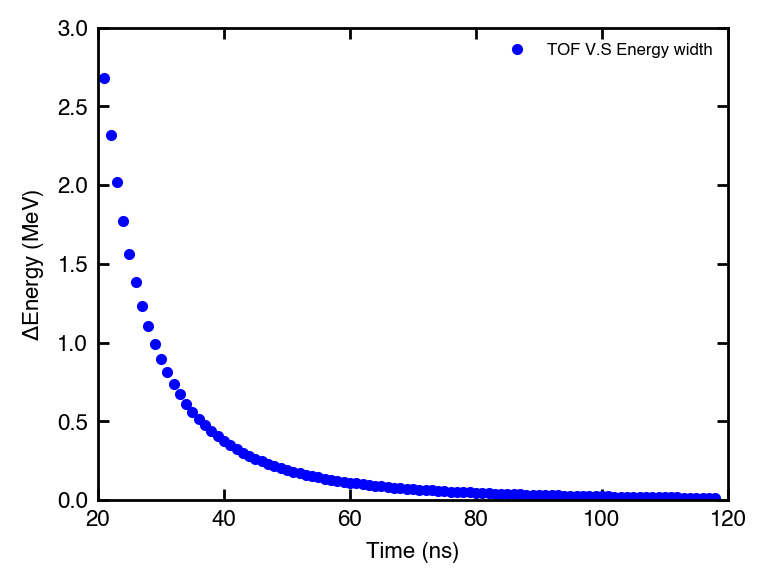

In [3246]:
time_along= np.arange(20,120,1)
E_along = Time_to_energy(time_along)

fig = fig_pre_def() # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111
#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(time_along[:-1],E_width_along,'.b',linewidth =2,label = 'TOF V.S Energy width')

fig_post_def(xlim=(20,120),ylim=(0,3), xlabel ='Time (ns)',ylabel = '$\Delta$Energy (MeV)')



In [3247]:
print(Time_to_energy(50))
print(Time_to_energy_wo_realitistic(50))
print(Time_to_energy(50)/Time_to_energy_wo_realitistic(50))

4.91075340155734
4.633565624999999
1.0598217008218893


In [3248]:
def Energy_to_time_wo_realitistic(E):
    distance = 1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(E).__module__ == np.__name__:
        #print(type(TOF))
        if E.any()==0:
            return 0
        else:
            E_J = E*(1.6*10**-19)*(10**6)
            neutron_TOF = (distance*(neutron_mass/(2*E_J))**0.5)*10**9
            return neutron_TOF
    else:
        E_J = E*(1.6*10**-19)*(10**6)
        neutron_TOF = (distance*(neutron_mass/(2*E_J))**0.5)*10**9
        return neutron_TOF

In [3249]:
print(Energy_to_time_wo_realitistic(8))
print(Time_to_energy_wo_realitistic(100))

38.05245403140906
1.1583914062499998


In [3250]:
print(np.round(neutron_E_threshold_selected[:,0],2))

[1.95 2.82 1.45 ... 1.82 1.61 2.17]


In [3251]:
resolution_time =0.01 #ns

neutron_E_threshold_selected = neutron_time_threshold_selected.copy()
neutron_E_threshold_selected[:,0] = Time_to_energy(np.round(neutron_E_threshold_selected[:,0]/resolution_time)*resolution_time  )

print(neutron_E_threshold_selected)

[[1.95083903 0.342377   0.479106   4.         0.27086   ]
 [2.81569824 0.317992   0.147941   4.         0.17806   ]
 [1.453765   0.435829   0.231506   4.         0.44602   ]
 ...
 [1.82252644 0.346512   0.26617    4.         0.2581    ]
 [1.61375691 0.352239   0.207365   4.         0.12702   ]
 [2.17293601 0.392      0.232125   4.         0.754     ]]


## plot spectrum without efficiency correction

In [3252]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 120 # cut to 100 pieces
Neutron_E_axis, Neutron_energy_counts = sorting(
    neutron_E_threshold_selected[:,0]*(4/3), Binning , Neutron_energy_lower, Neutron_energy_upper)

(0.0, 166.95)

<Figure size 629.921x472.441 with 0 Axes>

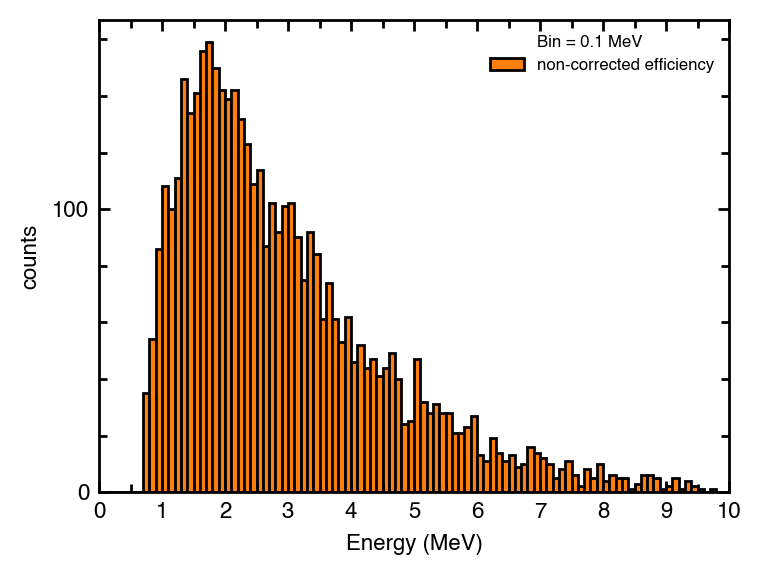

In [3253]:

fig_pre_def()

fig = fig_pre_def() # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 0.1 MeV')
#ax.bar(Neutron_E_axis, Neutron_energy_counts, label= 'non-corrected efficiency')
ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'non-corrected efficiency')

#plt.plot(Neutron_E_axis*(4/3), Neutron_energy_counts)
fig_post_def(xticks=(1,0.5),yticks=(100,20),xlabel ='Energy (MeV)',ylabel = 'counts')

plt.xlim(0,10)
plt.ylim(0,)

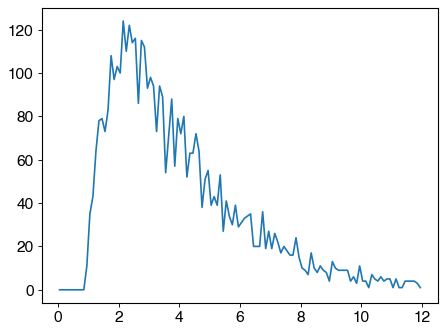

In [3254]:
plt.plot(Neutron_E_axis, Neutron_energy_counts)

In [3255]:
# confrim the LO in trigger detector

In [3256]:
neutron_E_LO = neutron_E_threshold_selected.copy()

In [3257]:
energy_selected = [0,0,0,0,0] 

ROI_E = 9

for i in np.arange(0,len(neutron_E_LO[:,0]),1):
    if neutron_E_LO[i,0] <ROI_E+0.5 and neutron_E_LO[i, 0]>ROI_E-0.5 :
        energy_selected=np.vstack((energy_selected,neutron_E_LO[i,:]))
    
energy_selected = energy_selected[1:,:]
print(energy_selected)

[[9.19293329 0.328519   3.214467   4.         0.42746   ]
 [9.43688181 0.369141   0.633856   4.         0.13108   ]
 [9.1020177  0.337209   3.19404    4.         0.16472   ]
 [9.32149344 0.382175   0.409778   4.         0.14848   ]
 [8.56103197 0.395129   0.914882   4.         0.32596   ]
 [8.89023924 0.336613   0.880837   4.         0.319     ]
 [9.04215816 0.343694   1.035587   4.         0.45704   ]
 [8.67180262 0.331845   2.771882   4.         0.57478   ]
 [8.74685408 0.366366   1.442889   4.         0.17458   ]
 [9.38416715 0.338292   2.870922   4.         0.17052   ]
 [8.61614905 0.424242   0.163416   4.         0.26158   ]
 [8.88540284 0.346939   0.090993   4.         0.28536   ]
 [8.73270755 0.346647   0.821413   4.         0.1711    ]
 [8.50191921 0.42087    0.355925   4.         0.20706   ]
 [8.74685408 0.353016   2.924775   4.         0.13108   ]
 [8.61614905 0.360333   1.413796   4.         0.50634   ]
 [8.79425944 0.34505    1.919519   4.         0.80736   ]
 [9.44217782 0

<Figure size 629.921x472.441 with 0 Axes>

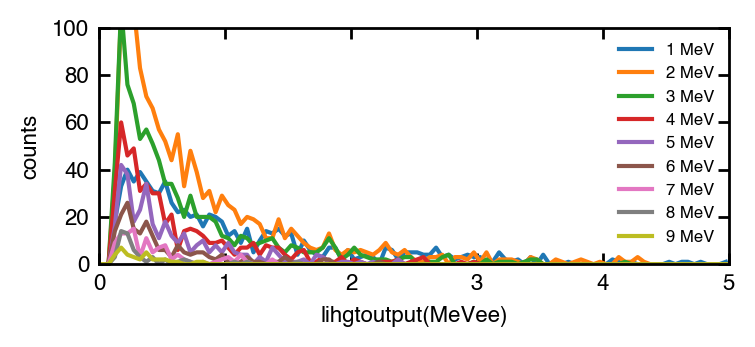

In [3258]:
fig_pre_def()

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 




for ROI_E in np.arange(1,10,1):
    energy_selected = [0,0,0,0,0] 



    for j in np.arange(0,len(neutron_E_LO[:,0]),1):
        if neutron_E_LO[j,0] <ROI_E+0.5 and neutron_E_LO[j, 0]>ROI_E-0.5 :
            energy_selected=np.vstack((energy_selected,neutron_E_LO[j,:]))
    #print(energy_selected)
    energy_selected = energy_selected[1:,:]
    axis_LO, hist_LO = sorting(energy_selected[:,4],100,0,5)
    ax.plot(axis_LO, hist_LO,label=str(ROI_E)+' MeV')

fig_post_def(xlim=(0,5),ylim=(0,100),xlabel='lihgtoutput(MeVee)',ylabel='counts')    
#plt.legend(fontsize = 18, title_fontsize=18,title = '$E_n\'$')

# print(energy_selected)

# Include the recoil proton energy 

In [3259]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO

In [3260]:
enegy_range= np.arange(0,10,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  4.93395618e+00
  4.93401698e+00  4.93407777e+00]


In [3261]:
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

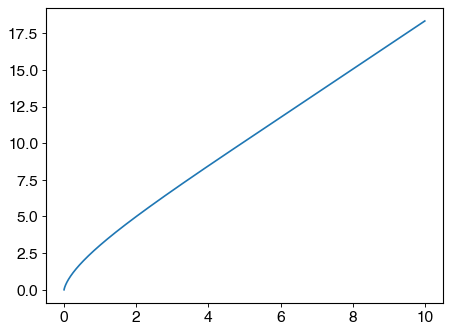

In [3262]:
LO_range= np.arange(0,10,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

In [3263]:
print(P_Energy_inter[int(0.15*100000)])

0.8170083261951951


<Figure size 629.921x472.441 with 0 Axes>

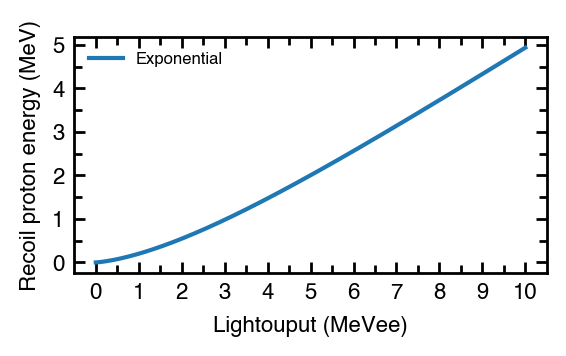

In [3264]:
fig_pre_def()

fig = fig_pre_def(6,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 2, 1) 
ax.plot(enegy_range,lightoutput_2inches,label ='Exponential')
#ax.plot(P_Energy_inter,LO_range)
fig_post_def(xticks=(1,0.5),yticks=(1,0.5),xlabel ='Lightouput (MeVee)',ylabel = 'Recoil proton energy (MeV)')
#plt.yscale('log')
#ax2 =fig.add_subplot(1, 2, 2) 
#ax2.plot(LO_range,P_Energy_inter,label ='Exponential')




In [3265]:
print('Energy/      PSD/       LO/        Channel/   LO at trigger detector')
print(neutron_E_threshold_selected)

Energy/      PSD/       LO/        Channel/   LO at trigger detector
[[1.95083903 0.342377   0.479106   4.         0.27086   ]
 [2.81569824 0.317992   0.147941   4.         0.17806   ]
 [1.453765   0.435829   0.231506   4.         0.44602   ]
 ...
 [1.82252644 0.346512   0.26617    4.         0.2581    ]
 [1.61375691 0.352239   0.207365   4.         0.12702   ]
 [2.17293601 0.392      0.232125   4.         0.754     ]]


In [3266]:
recoil_proton_E = []
N_Eth_PE=[]
for i in np.arange(0,len(neutron_E_threshold_selected[:,4]),1):
    index = int(neutron_E_threshold_selected[i,4]*100000)
    #print(neutron_E_threshold_selected[i,4],' ',index,' ',lightoutput_2inches_inter[index])
    N_Eth_PE_temp = np.append(neutron_E_threshold_selected[i,:],P_Energy_inter[index])
    
    if i ==0:
        N_Eth_PE = N_Eth_PE_temp.copy()
    else:
        N_Eth_PE = np.vstack((N_Eth_PE,N_Eth_PE_temp))
print('Energy/      PSD/       LO/        Channel/   LO@Trigger/porton deposited in trigger detector')
print(N_Eth_PE)

Energy/      PSD/       LO/        Channel/   LO@Trigger/porton deposited in trigger detector
[[1.95083903 0.342377   0.479106   4.         0.27086    1.23380953]
 [2.81569824 0.317992   0.147941   4.         0.17806    0.92147596]
 [1.453765   0.435829   0.231506   4.         0.44602    1.74074882]
 ...
 [1.82252644 0.346512   0.26617    4.         0.2581     1.19324613]
 [1.61375691 0.352239   0.207365   4.         0.12702    0.72654482]
 [2.17293601 0.392      0.232125   4.         0.754      2.50118218]]


(0.0, 12.0)

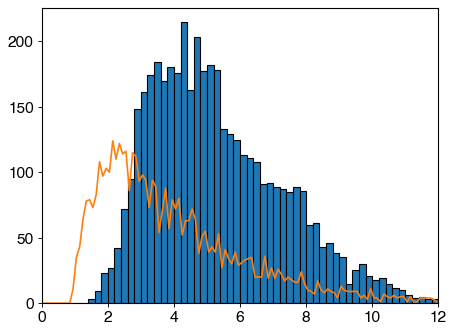

In [3267]:
sum_by_LO = N_Eth_PE[:,0]+N_Eth_PE[:,5]
plt.hist(sum_by_LO,bins=75,edgecolor='black',range=(0,15), label= 'non-corrected efficiency')
plt.plot(Neutron_E_axis, Neutron_energy_counts)
plt.xlim(0,12)

In [3268]:
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,3)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

In [3269]:

Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 10 # 10 MeV
Binning = 1000 # cut to 100 pieces
Neutron_E_axis, Neutron_energy_counts_LO_add = sorting(
    N_Eth_PE[:,4], Binning , Neutron_energy_lower, Neutron_energy_upper)

(0.0, 0.2)

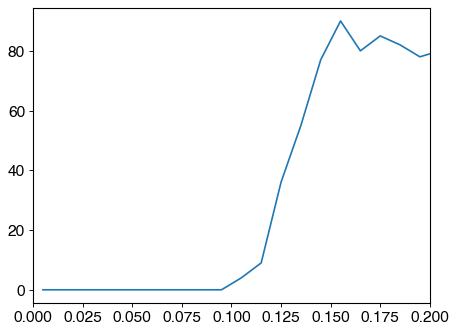

In [3270]:
plt.plot(Neutron_E_axis, Neutron_energy_counts_LO_add)
plt.xlim(0,0.2)

In [3271]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis, Neutron_energy_counts_LO_add = sorting(
    N_Eth_PE[:,0]+N_Eth_PE[:,5], Binning , Neutron_energy_lower, Neutron_energy_upper)

In [3272]:
ISO_spectrum = np.loadtxt('Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('Neutron_spectrum/Scherzinger_2015.txt')

sumed_energy = []

for i in np.arange(0,len(neutron_E_threshold_selected[:,0]),1):
    sumed_energy = np.append(sumed_energy,neutron_E_threshold_selected[i,0]+recoil_proton_E[i])
    

axis_sumed_E_noncor, hist_sumed_E_noncor = sorting(sumed_energy[:],150,0,15)

<Figure size 629.921x472.441 with 0 Axes>

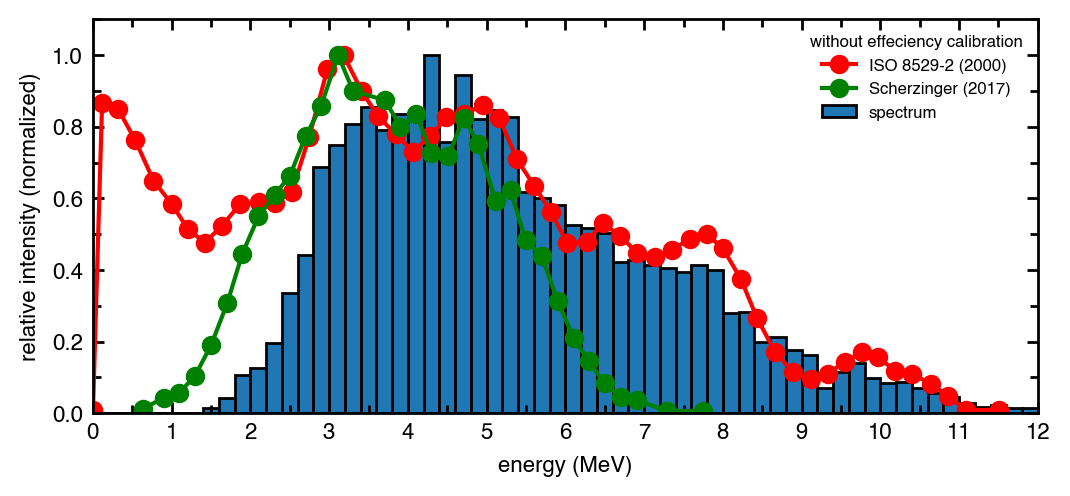

In [3273]:


fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, Neutron_energy_counts_LO_add/Neutron_energy_counts_LO_add.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




684.55105105  690.56906907  893.93743744 1219.11561562 2119.48998999 2471.57257257 2939.73473473 2826.32532533

In [3274]:
output_N_scatter = Neutron_E_axis[:,np.newaxis]
output_N_scatter = np.column_stack((output_N_scatter,Neutron_energy_counts_LO_add[:,np.newaxis]))
#print(output_N_scatter)
#np.savetxt("N_scatter_20220923.txt",output_N_scatter)

#  efficiency weighting

In [3275]:
efficiency = np.loadtxt('20220211_efficiency.txt')

In [3276]:
axis_neutron_noncor, hist_neutron_noncor = sorting(neutron_E_threshold_selected[:,0],100,0,10)

<Figure size 629.921x472.441 with 0 Axes>

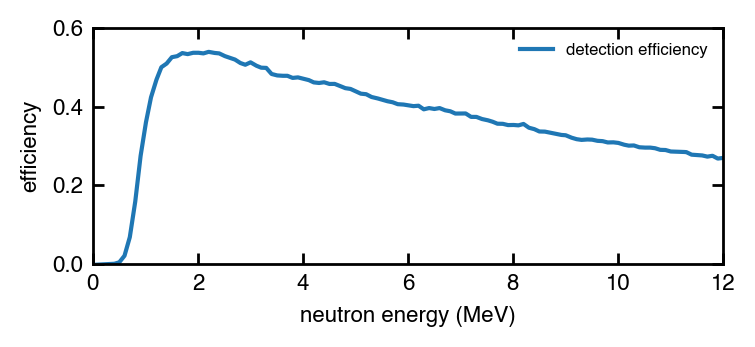

In [3277]:
fig_pre_def()

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

interpoplation_axis= np.arange(0,12,0.001) # unit 0.0001 # times 10000

interpolation_func  = interp1d(efficiency[:,0],efficiency[:,1],fill_value="extrapolate") 
efficiency_corrected_yaxis = interpolation_func(interpoplation_axis)
#efficiency_corrected_yaxis = np.round(efficiency_corrected_yaxis,3)
plt.plot(interpoplation_axis,efficiency_corrected_yaxis,'-',label = 'detection efficiency')

fig_post_def(xlim=(0,12),ylim=(0,0.6),xlabel='neutron energy (MeV)',ylabel='efficiency')

In [3278]:
for i in np.arange(0,len(N_Eth_PE[:,0]),1):
    if N_Eth_PE[i,0]>10:
        print(N_Eth_PE[i,0])

11.490456361962954
13.306258043120346
10.592457759540695
10.135307848781729
10.024219639186972
13.884734757471152
11.370298557920023
16.95396323744529
10.158931362896668
11.907640157905316
10.486149301709798
13.790405193248468
11.176484817668555
10.548487668984645
12.805279673271809
10.542228710393223
12.15194860388778
11.656097456042987
16.52625650712008
19.382274534610335
10.908139723700698
11.751319926579244
13.156394962019741
10.041637441816471
11.526161740230755
10.236284023623233
10.579866705275437
11.51900728059119
10.855638105056375
12.889600961370206


In [3279]:
# selecte the energy lower than 12

In [3280]:
print(N_Eth_PE)
N_Eth_PE_test=N_Eth_PE.copy()
N_Eth_PE_test= np.vstack((N_Eth_PE_test,[0,0,0,0,0,0]))
print(N_Eth_PE_test)

[[1.95083903 0.342377   0.479106   4.         0.27086    1.23380953]
 [2.81569824 0.317992   0.147941   4.         0.17806    0.92147596]
 [1.453765   0.435829   0.231506   4.         0.44602    1.74074882]
 ...
 [1.82252644 0.346512   0.26617    4.         0.2581     1.19324613]
 [1.61375691 0.352239   0.207365   4.         0.12702    0.72654482]
 [2.17293601 0.392      0.232125   4.         0.754      2.50118218]]
[[1.95083903 0.342377   0.479106   4.         0.27086    1.23380953]
 [2.81569824 0.317992   0.147941   4.         0.17806    0.92147596]
 [1.453765   0.435829   0.231506   4.         0.44602    1.74074882]
 ...
 [1.61375691 0.352239   0.207365   4.         0.12702    0.72654482]
 [2.17293601 0.392      0.232125   4.         0.754      2.50118218]
 [0.         0.         0.         0.         0.         0.        ]]


In [3281]:
"""N_Eth_PE_eff=np.array([0,0,0,0,0,0,0])
for i in np.arange(0,len(N_Eth_PE[:,0]),1):
    if N_Eth_PE[i,0]>12:
        continue
    N_Eth_PE_eff_temp=N_Eth_PE[i,:].copy()
    #print(N_Eth_PE_eff_temp)
    for ii in np.arange(0,len(interpoplation_axis),1):
        if ((N_Eth_PE[i,0]>interpoplation_axis[ii-1])and (N_Eth_PE[i,0]<interpoplation_axis[ii])):
            N_Eth_PE_eff_temp=np.append(N_Eth_PE_eff_temp,efficiency_corrected_yaxis[ii])
            N_Eth_PE_eff = np.vstack((N_Eth_PE_eff,N_Eth_PE_eff_temp))
N_Eth_PE_eff= N_Eth_PE_eff[1:,:]
"""

'N_Eth_PE_eff=np.array([0,0,0,0,0,0,0])\nfor i in np.arange(0,len(N_Eth_PE[:,0]),1):\n    if N_Eth_PE[i,0]>12:\n        continue\n    N_Eth_PE_eff_temp=N_Eth_PE[i,:].copy()\n    #print(N_Eth_PE_eff_temp)\n    for ii in np.arange(0,len(interpoplation_axis),1):\n        if ((N_Eth_PE[i,0]>interpoplation_axis[ii-1])and (N_Eth_PE[i,0]<interpoplation_axis[ii])):\n            N_Eth_PE_eff_temp=np.append(N_Eth_PE_eff_temp,efficiency_corrected_yaxis[ii])\n            N_Eth_PE_eff = np.vstack((N_Eth_PE_eff,N_Eth_PE_eff_temp))\nN_Eth_PE_eff= N_Eth_PE_eff[1:,:]\n'

In [3282]:
N_Eth_PE_eff=[]
for i in np.arange(0,len(N_Eth_PE[:,0]),1):
    if N_Eth_PE[i,0]>12:
        continue
    index = int(N_Eth_PE[i,0]*1000)
    
    #print(neutron_E_threshold_selected[i,4],' ',index,' ',lightoutput_2inches_inter[index])
    
    N_Eth_PE_eff_temp = np.append(N_Eth_PE[i,:],efficiency_corrected_yaxis[index])

    if i ==0:
        N_Eth_PE_eff = N_Eth_PE_eff_temp.copy()
    else:
        N_Eth_PE_eff = np.vstack((N_Eth_PE_eff,N_Eth_PE_eff_temp))
print('Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ eff')
print(N_Eth_PE_eff)

Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ eff
[[1.95083903 0.342377   0.479106   ... 0.27086    1.23380953 0.53702173]
 [2.81569824 0.317992   0.147941   ... 0.17806    0.92147596 0.51059792]
 [1.453765   0.435829   0.231506   ... 0.44602    1.74074882 0.5178095 ]
 ...
 [1.82252644 0.346512   0.26617    ... 0.2581     1.19324613 0.53414629]
 [1.61375691 0.352239   0.207365   ... 0.12702    0.72654482 0.52907334]
 [2.17293601 0.392      0.232125   ... 0.754      2.50118218 0.53820511]]


In [3283]:
print('Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ \n eff')
print(N_Eth_PE_eff[0,:])

Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ 
 eff
[1.95083903 0.342377   0.479106   4.         0.27086    1.23380953
 0.53702173]


In [3284]:
#scatter_eff_ip=np.loadtxt("../N_scattering_3in_30degree_2in_trigger_simulation/scatter_eff.txt")

#isotropic source
#scatter_eff_ip=np.loadtxt("../N_scattering_3in_30degree_2in_trigger_simulation/scatter_eff_iso_source.txt")

#scatter_eff_ip=np.loadtxt("../N_scattering_3in_30degree_2in_trigger_simulation/TOF_effciency.txt")
# TOF simulation
scatter_eff_ip=np.loadtxt("../Neutron_scatter_exp_simulation/TOF_effciency.txt")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(12000,)


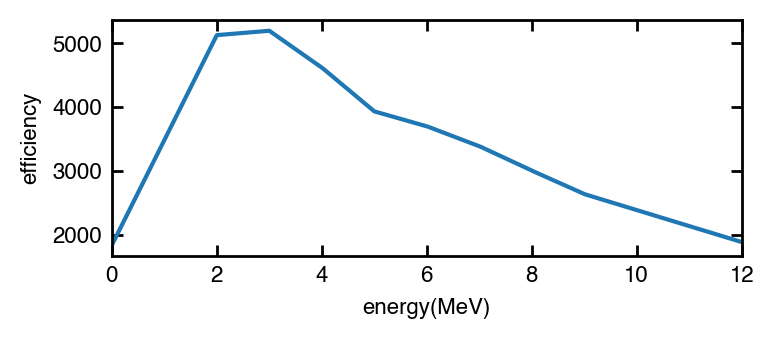

In [3285]:
#scatter_eff_ip[7,1]=0.00015*(5*10**7)
#scatter_eff_ip[7,1]=0.00012*(5*10**7)
fig = fig_pre_def(8,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
interp_axis= np.arange(0,12,0.001) # unit 0.0001 # times 10000

interpolation_func  = interp1d(scatter_eff_ip[:,0],scatter_eff_ip[:,1],fill_value="extrapolate") 
scatter_eff = interpolation_func(interp_axis)

plt.plot(interp_axis,scatter_eff)
fig_post_def(xlabel='energy(MeV)', ylabel='efficiency',xlim=(0,12))
print(scatter_eff.shape)

In [3318]:
N_Eth_PE_eff_all=[]
for i in np.arange(0,len(N_Eth_PE_eff[:,0]),1):
    if N_Eth_PE_eff[i,0]>12:
        continue
    #index = int(N_Eth_PE_eff[i,0]*(4/3)*1000)
    index = int((N_Eth_PE[i,0]+N_Eth_PE[i,5])*1000)
    
    #print(neutron_E_threshold_selected[i,4],' ',index,' ',lightoutput_2inches_inter[index])
    if index>12000:
        continue
    N_Eth_PE_eff_temp = np.append(N_Eth_PE_eff[i,:],scatter_eff[index])

    if i == 0:
        N_Eth_PE_eff_all = N_Eth_PE_eff_temp.copy()
    else:
        N_Eth_PE_eff_all = np.vstack((N_Eth_PE_eff_all,N_Eth_PE_eff_temp))
print('Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ detector eff / trigger scatter eff')
print(N_Eth_PE_eff_all[0,:])
print(N_Eth_PE_eff_all.shape)

Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ detector eff / trigger scatter eff
[1.95083903e+00 3.42377000e-01 4.79106000e-01 4.00000000e+00
 2.70860000e-01 1.23380953e+00 5.37021728e-01 5.09501600e+03]
(4379, 8)


#  Set the lightoutput threshold

(0.05, 0.25)

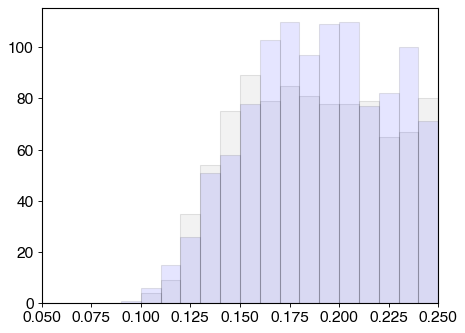

In [3319]:
y_tri = plt.hist(N_Eth_PE_eff_all[:,4],1000,range=(0,10),color="gray",alpha=0.1,edgecolor = "k")
y_rec = plt.hist(N_Eth_PE_eff_all[:,2],1000,range=(0,10),color="blue",alpha=0.1,edgecolor = "k")
plt.xlim(0.05,0.25)

In [3334]:
print(N_Eth_PE_eff_all.shape)
N_Eth_PE_eff_all =N_Eth_PE_eff_all[N_Eth_PE_eff_all[:,4]>0.1]
N_Eth_PE_eff_all =N_Eth_PE_eff_all[N_Eth_PE_eff_all[:,2]>0.3]
print(N_Eth_PE_eff_all.shape)

(3725, 8)
(2895, 8)


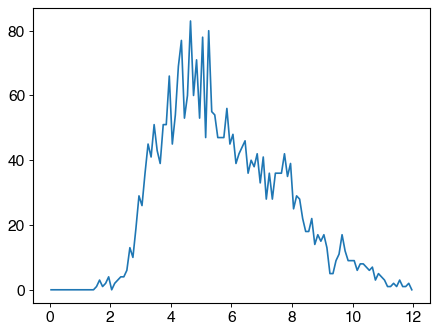

In [3335]:
Final_E_temp = (N_Eth_PE_eff_all[:,0]+N_Eth_PE_eff_all[:,5])
#Final_E_temp = (N_Eth_PE_eff_all[:,0]*(4/3))
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 120 # cut to 100 pieces
Final_E_axis, Final_E = sorting(
    Final_E_temp, Binning , Neutron_energy_lower, Neutron_energy_upper)
plt.plot(Final_E_axis, Final_E )

In [3336]:
bin_width=0.2
spectrum_x = np.arange(0,20,bin_width)
spectrum_hist = np.zeros(len(spectrum_x))
print(spectrum_x)

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4
 19.6 19.8]


In [3337]:
print(spectrum_x[int(np.round((2.11*(bin_width**-1)),0))])

2.2


In [3338]:
spectrum_hist = np.zeros(len(spectrum_x))
for i in np.arange(0,len(N_Eth_PE_eff_all[:,0]),1):
    E_tot = N_Eth_PE_eff_all[i,0]+N_Eth_PE_eff_all[i,5]
    #E_tot = N_Eth_PE_eff_all[i,0]*(4/3)
    spectrum_hist[int(np.round((E_tot*(bin_width**-1)),0))] += (N_Eth_PE_eff_all[i,6]*N_Eth_PE_eff_all[i,7])**-1
    #spectrum_hist[int(E_tot*(bin_width**-1))] += (N_Eth_PE_eff_all[i,6])**-1
#print(spectrum_hist)

(0.0, 11.0)

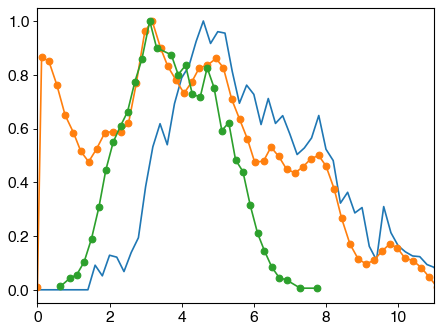

In [3339]:
#spectrum_hist[:10]=0
plt.plot(spectrum_x,spectrum_hist/spectrum_hist.max())
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
plt.xlim(0,11)

Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

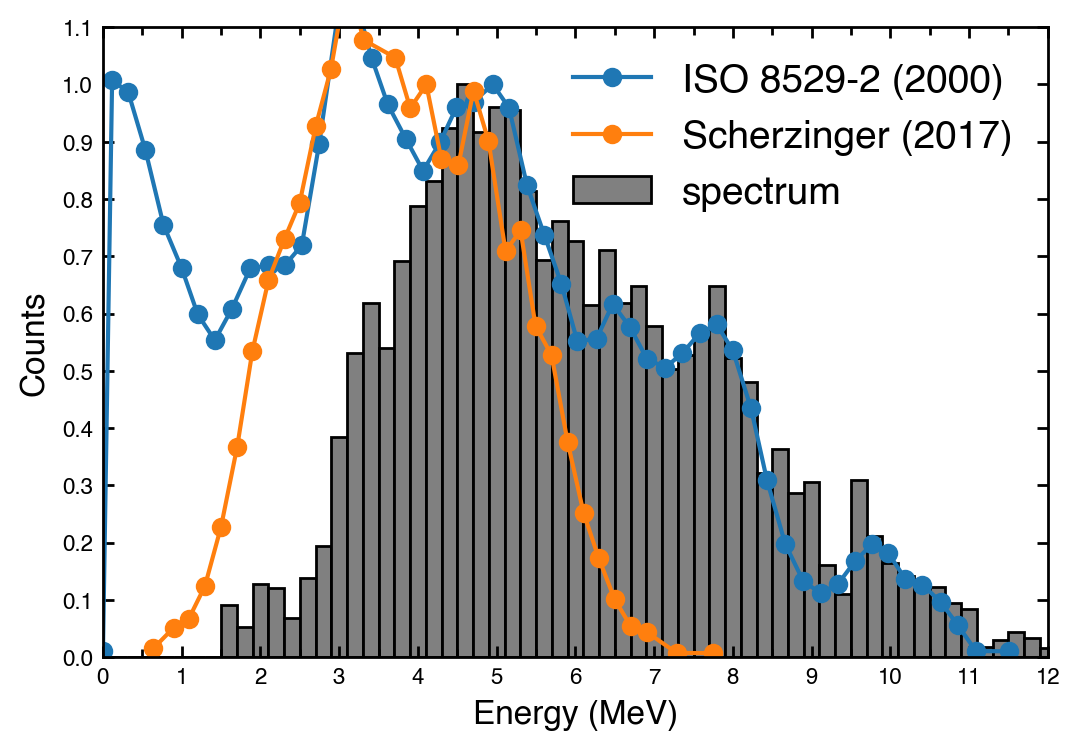

In [3340]:

fig_pre_def()

fig = fig_pre_def(12,8) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

#plt.plot(spectrum_x,1*spectrum_hist/spectrum_hist.max(),'o-')
ax.bar(0+spectrum_x, 1.0*spectrum_hist/spectrum_hist.max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[20:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[15:,1].max(),'o-',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')



fig_post_def(xlim=(0,12),ylim=(0,1.1),lg_fs=14,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



In [3341]:
output_N_scatter = spectrum_x[:,np.newaxis]
output_N_scatter = np.column_stack((output_N_scatter,spectrum_hist[:,np.newaxis]))

In [3342]:
#np.savetxt("N_scatter_20221113.txt",output_N_scatter)

In [3343]:
# without consider efficiencty

In [3344]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis, Neutron_energy_counts_LO_add = sorting(
    N_Eth_PE_eff_all[:,0]+N_Eth_PE_eff_all[:,5], Binning , Neutron_energy_lower, Neutron_energy_upper)
    

Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

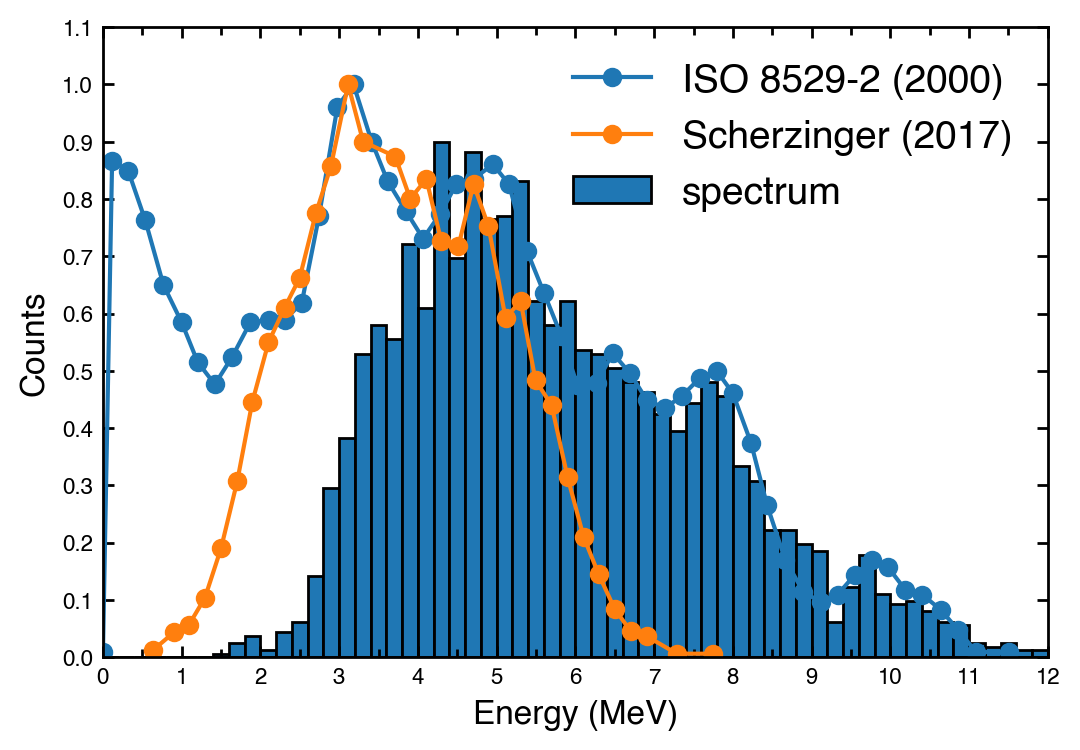

In [3345]:

fig_pre_def()

fig = fig_pre_def(12,8) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

#plt.plot(spectrum_x,1*spectrum_hist/spectrum_hist.max(),'o-')
ax.bar(Neutron_E_axis, 0.9*Neutron_energy_counts_LO_add/Neutron_energy_counts_LO_add.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')



fig_post_def(xlim=(0,12),ylim=(0,1.1),lg_fs=14,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)



In [3346]:
output_N_scatter = Neutron_E_axis[:,np.newaxis]
output_N_scatter = np.column_stack((output_N_scatter,Neutron_energy_counts_LO_add[:,np.newaxis]))

In [3347]:
np.savetxt("N_scatter_20221113.txt",output_N_scatter)

# extract 4 MeV data

In [872]:
N_Eth_PE_eff_peak = []

print(len(N_Eth_PE_eff_peak))

0


In [1907]:
N_Eth_PE_eff_peak =  N_Eth_PE_eff_all[0,:]

for i in np.arange(0,len(N_Eth_PE_eff_all[:,0]),1):
    original_E = (N_Eth_PE_eff_all[i,0]+N_Eth_PE_eff_all[i,5])
    if (original_E>3.75) and (original_E<4.5):
        N_Eth_PE_eff_peak_temp = N_Eth_PE_eff_all[i,:]
        N_Eth_PE_eff_peak = np.vstack((N_Eth_PE_eff_peak,N_Eth_PE_eff_peak_temp))

N_Eth_PE_eff_peak=N_Eth_PE_eff_peak[1:,:]
print('Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ detector eff / trigger scatter eff')
print(N_Eth_PE_eff_peak)

Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ detector eff / trigger scatter eff
[[1.90090183e+00 3.85655000e-01 5.95478000e-01 ... 2.20286375e+00
  5.36872804e-01 6.22717100e-05]
 [2.01804422e+00 3.37232000e-01 3.17547000e-01 ... 2.32931513e+00
  5.36812909e-01 6.02147900e-05]
 [1.94032743e+00 3.58306000e-01 5.70099000e-01 ... 1.86811490e+00
  5.36991943e-01 6.33627200e-05]
 ...
 [2.43982303e+00 3.60784000e-01 4.73535000e-01 ... 2.00196876e+00
  5.33081105e-01 6.89772700e-05]
 [1.34343176e+00 3.97683000e-01 3.20642000e-01 ... 2.47980088e+00
  5.03836761e-01 5.57828000e-05]
 [2.92961621e+00 3.83588000e-01 3.24356000e-01 ... 1.50397505e+00
  5.08245843e-01 6.38348400e-05]]


<Figure size 629.921x472.441 with 0 Axes>

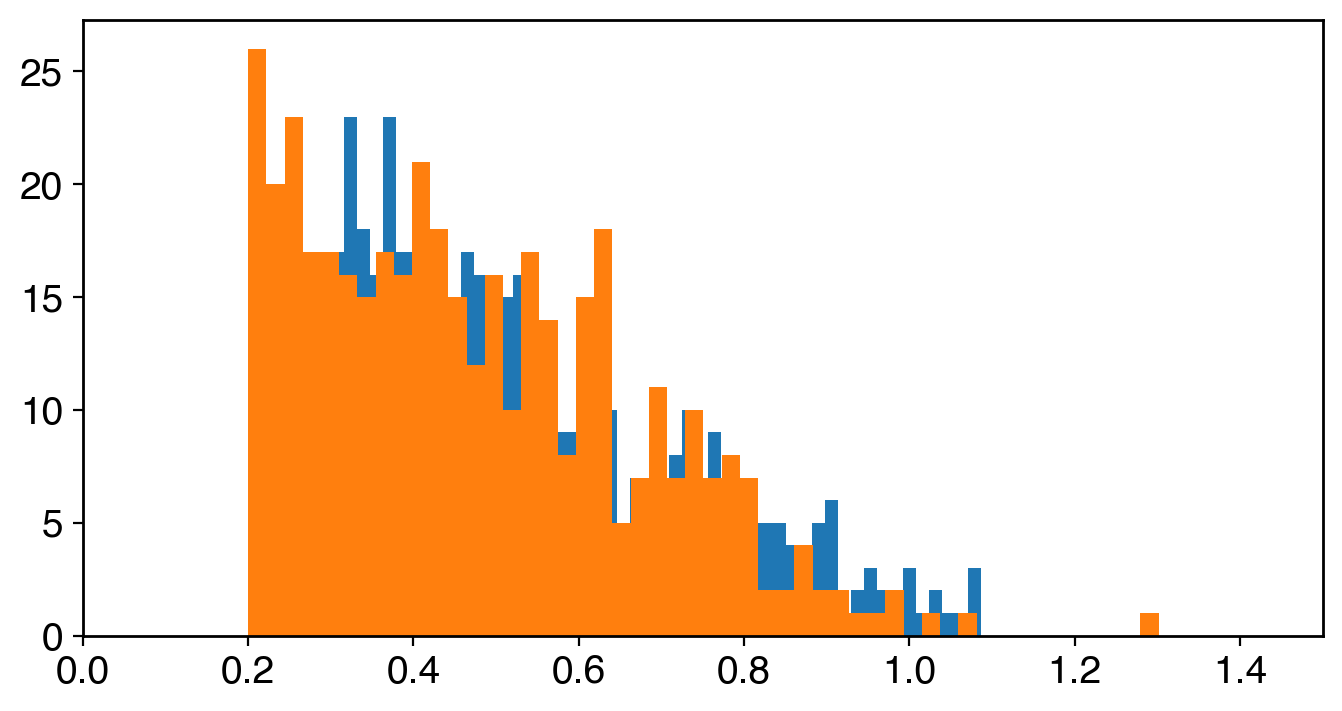

In [1909]:
fig_pre_def()
fig = plt.figure(figsize=(8,4))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

#ax.hist2d(N_Eth_PE_eff_peak[:,0], N_Eth_PE_eff_peak[:,5], bins=(100, 100),cmin=1, cmap=plt.cm.jet)
ax.hist(N_Eth_PE_eff_peak[:,2], bins=(50))
ax.hist(N_Eth_PE_eff_peak[:,4], bins=(50))
#ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
#ax.set_ylabel('PSD ',fontsize=18)

#plt.ylim(0.2,0.5)
plt.xlim(0,1.5)

plt.show()

<Figure size 629.921x472.441 with 0 Axes>

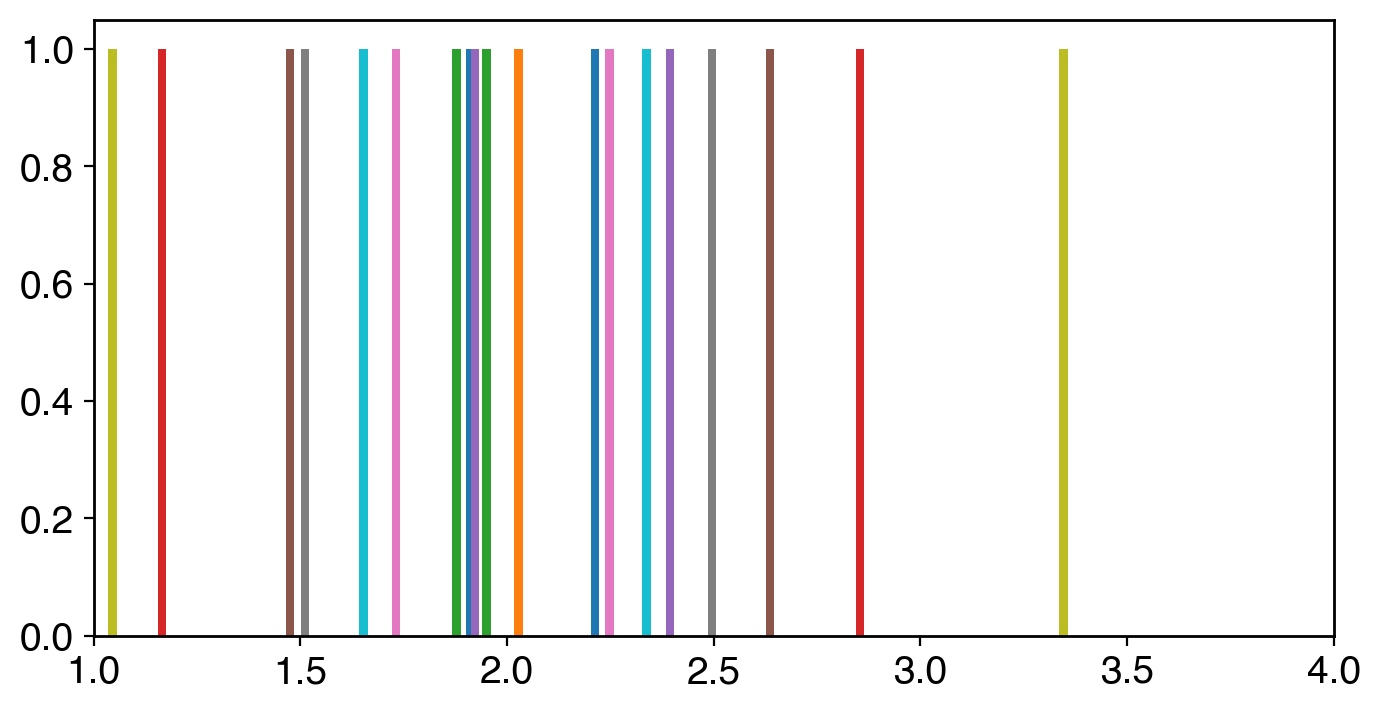

In [1917]:
fig_pre_def()
fig = plt.figure(figsize=(8,4))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

#ax.hist2d(N_Eth_PE_eff_peak[:,0], N_Eth_PE_eff_peak[:,5], bins=(100, 100),cmin=1, cmap=plt.cm.jet)
for i in np.arange(0,10,1):
    ax.hist(N_Eth_PE_eff_peak[i,0], bins=(50))
for i in np.arange(0,10,1):
    ax.hist(N_Eth_PE_eff_peak[i,5], bins=(50))
#ax.set_xlabel('TOF (ns)',fontsize=18) # labelpad=10 與座標軸間的距離
#ax.set_ylabel('PSD ',fontsize=18)

#plt.ylim(0.2,0.5)
plt.xlim(1,4)

plt.show()

# spectrum 

In [757]:
bin_width=0.2
spectrum_x = np.arange(0,16,bin_width)
spectrum_hist = np.zeros(len(spectrum_x))
#plt.plot(spectrum_x,spectrum_hist)

In [758]:
for i in np.arange(0,len(N_Eth_PE_eff[:,0]),1):
    E_tot = N_Eth_PE_eff[i,0]+N_Eth_PE_eff[i,5]
    spectrum_hist[int(E_tot*(bin_width**-1))] += (N_Eth_PE_eff[i,6])**-1
print(spectrum_hist)

[  0.           0.           0.           0.           0.
   0.          51.81619319  88.70751386 124.34940726 105.46097695
 111.64260817 276.16360951 137.53124091 319.32571263 297.93857491
 295.80639042 264.58861681 272.10933652 239.36253208 255.67370823
 266.13655949 274.0449773  232.71492011 313.66911072 284.39873256
 320.58796052 286.98864492 173.77104742 152.43835386 152.91398485
 158.98420523 140.31586698 132.29575991 127.09834994 113.78976563
 101.13460627 143.79003087  91.56642117 111.00923449  90.69626194
  49.29301987  70.92690164  52.9112867   49.46031822  40.05415695
  44.55747191  36.03339643  52.81549996  20.22063558  20.78512376
  28.68678354  22.68198247  16.61548439  14.31194993  12.09374651
   2.768007     3.32335036   0.          10.29412873   5.47261449
   3.50846356   0.           0.           3.65852097   0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           

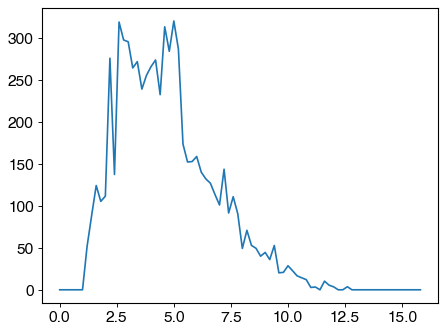

In [759]:
plt.plot(spectrum_x,spectrum_hist)

In [760]:
ISO_spectrum = np.loadtxt('Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('Neutron_spectrum/Scherzinger_2015.txt')

TypeError: fig_post_def() got an unexpected keyword argument 'x_ma'

<Figure size 629.921x472.441 with 0 Axes>

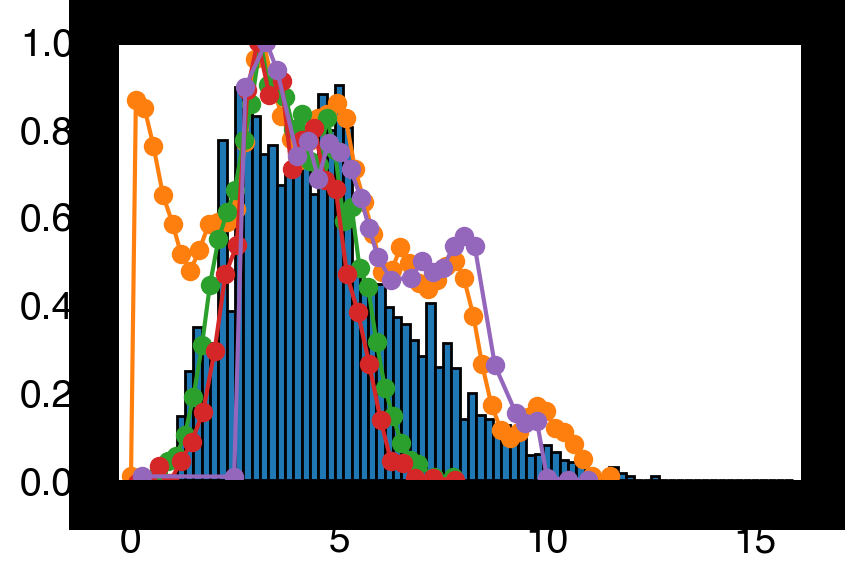

In [761]:

fig_pre_def()

fig = fig_pre_def(12,8,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin ='+str(bin_width)+ ' MeV')
plt.plot()
#ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'TOF measured')
plt.bar(spectrum_x,0.9*spectrum_hist/spectrum_hist[10:].max(),width=bin_width,edgecolor = "k",label = 'Measured')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

fig_post_def(x_ma=1,x_mi=0.5,y_ma=0.1,y_mi=0.05,xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,12)
plt.ylim(0,1.2)

<Figure size 629.921x472.441 with 0 Axes>

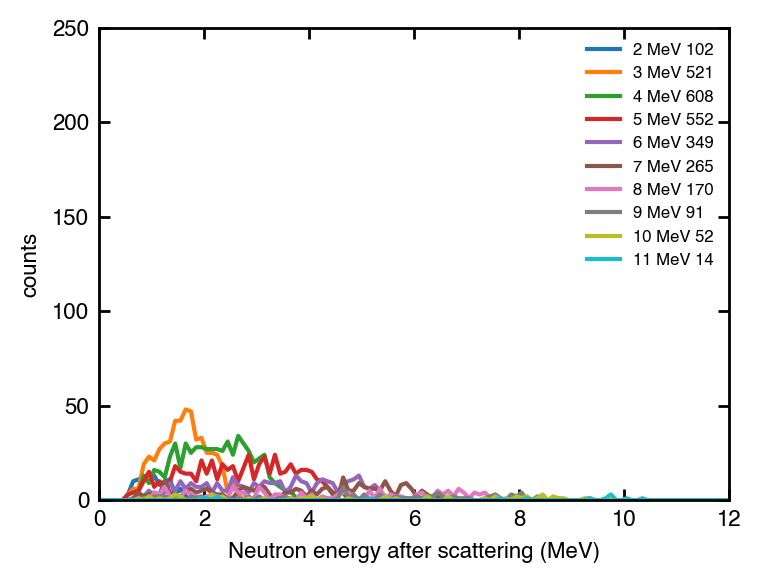

In [762]:
fig_pre_def()

fig = fig_pre_def(8,6) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

E_total_range=np.arange(2,12,1)
for i in np.arange(0,len(E_total_range),1):
    E_total_selected =[0,0,0,0,0,0,0]
    
    for j in np.arange(0,len(N_Eth_PE_eff[:,0]),1):
        E_tot = N_Eth_PE_eff[j,0]+N_Eth_PE_eff[j,5]
        
        if E_tot<E_total_range[i]+0.5 and E_tot>E_total_range[i]-0.5:
            E_total_selected=np.vstack((E_total_selected,N_Eth_PE_eff[j,:]))
    #print(E_total_selected)
    E_total_selected = E_total_selected[1:,:]
    axis_LO, hist_LO = sorting(E_total_selected[:,0],120,0,12)
    total_counts = sum(hist_LO)
    ax.plot(axis_LO, hist_LO,label=str(E_total_range[i])+' MeV '+str(total_counts))

fig_post_def(xlim=(0,12),ylim=(0,250),
             xlabel = 'Neutron energy after scattering (MeV)',
             ylabel = 'counts')    
#plt.legend(fontsize = 18, title_fontsize=18,title = '$E_n\'$')



<Figure size 629.921x472.441 with 0 Axes>

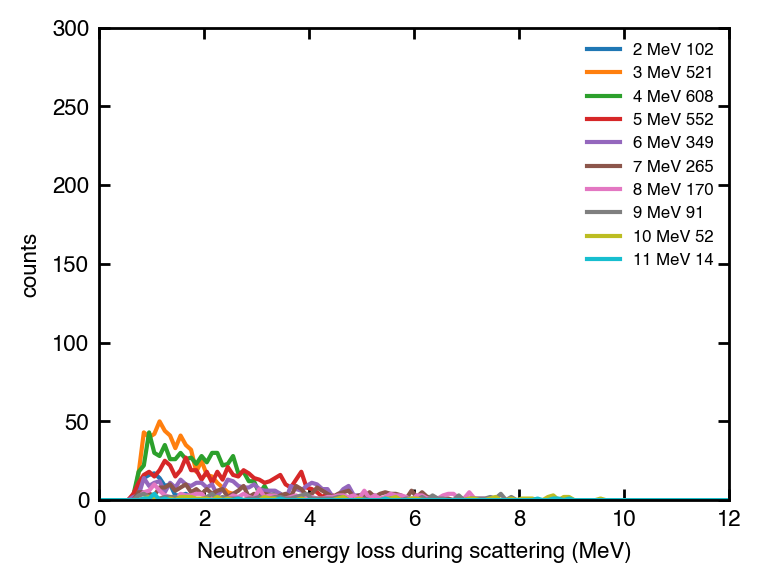

In [763]:
fig_pre_def()

fig = fig_pre_def(8,6) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

E_total_range=np.arange(2,12,1)
for i in np.arange(0,len(E_total_range),1):
    E_total_selected =[0,0,0,0,0,0,0]
    
    for j in np.arange(0,len(N_Eth_PE_eff[:,0]),1):
        E_tot = N_Eth_PE_eff[j,0]+N_Eth_PE_eff[j,5]
        
        if E_tot<E_total_range[i]+0.5 and E_tot>E_total_range[i]-0.5:
            E_total_selected=np.vstack((E_total_selected,N_Eth_PE_eff[j,:]))
    #print(E_total_selected)
    E_total_selected = E_total_selected[1:,:]
    axis_LO, hist_LO = sorting(E_total_selected[:,5],120,0,12)
    total_counts = sum(hist_LO)
    ax.plot(axis_LO, hist_LO,label=str(E_total_range[i])+' MeV '+str(total_counts))

fig_post_def(xlim=(0,12),ylim=(0,300),
             xlabel = 'Neutron energy loss during scattering (MeV)',
             ylabel = 'counts')    
#plt.legend(fontsize = 18, title_fontsize=18,title = '$E_n\'$')




<Figure size 629.921x472.441 with 0 Axes>

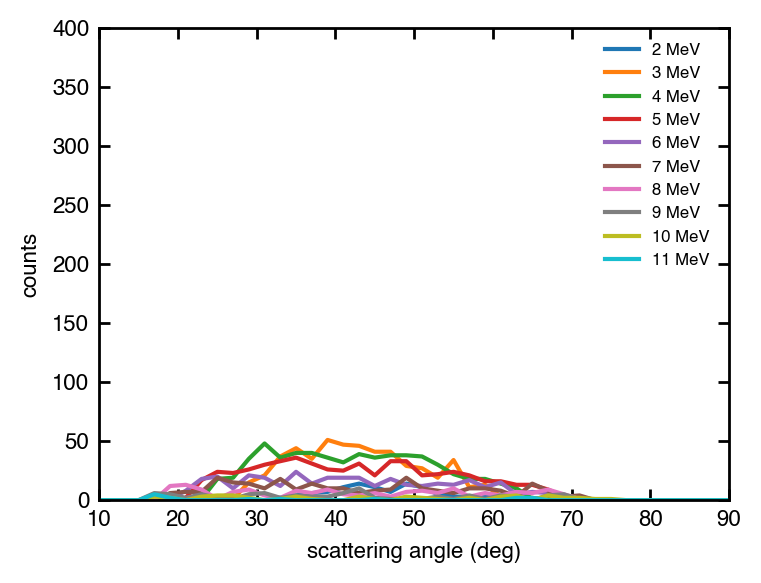

In [764]:
fig_pre_def()

fig = fig_pre_def(8,6) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

E_total_range=np.arange(2,12,1)
for i in np.arange(0,len(E_total_range),1):
    E_total_selected =[0,0,0,0,0,0,0]
    angle=[]
    for j in np.arange(0,len(N_Eth_PE_eff[:,0]),1):
        E_tot = N_Eth_PE_eff[j,0]+N_Eth_PE_eff[j,5]
        E_n_s = N_Eth_PE_eff[j,0]
        if E_tot<E_total_range[i]+0.5 and E_tot>E_total_range[i]-0.5:
            #E_total_selected=np.vstack((E_total_selected,N_Eth_PE_eff[j,:]))
            #print(E_total_selected)
            #E_total_selected = E_total_selected[1:,:]
            angle_temp = math.degrees(math.acos((E_tot/E_n_s)**-0.5))
            angle = np.append(angle,angle_temp)
    axis_LO, hist_LO = sorting(angle,90,0,180)
    total_counts = sum(hist_LO)
    ax.plot(axis_LO, hist_LO,label=str(E_total_range[i])+' MeV ')

fig_post_def(xlim=(10,90),
             ylim=(0,400),
             xlabel = 'scattering angle (deg)',
             ylabel = 'counts')    
#plt.legend(fontsize = 18, title_fontsize=18,title = '$E_n\'$')





In [765]:
N_Eth_PE_eff

array([[1.79049124, 0.342377  , 0.479106  , ..., 0.27086   , 1.23380953,
        0.53366174],
       [2.58739618, 0.317992  , 0.147941  , ..., 0.17806   , 0.92147596,
        0.52517793],
       [1.33373058, 0.435829  , 0.231506  , ..., 0.44602   , 1.74074882,
        0.50293744],
       ...,
       [4.86676538, 0.379884  , 1.821717  , ..., 1.75276   , 4.53732244,
        0.44605569],
       [1.14832927, 0.396721  , 0.188795  , ..., 0.99992   , 3.04454979,
        0.44231758],
       [1.89593441, 0.364552  , 0.614667  , ..., 1.06372   , 3.17945997,
        0.53669803]])

In [ ]:
E_total_range=np.arange(2,12,1)
for i in np.arange(0,len(E_total_range),1):
    response
    for j in np.arange(0,len(N_Eth_PE_eff[:,0]),1):
        E_n_after_scatter = N_Eth_PE_eff[j,0]
        

NameError: name 'response' is not defined

In [ ]:
trigger_det_efficiency_x = np.arange(0,11,1)
trigger_det_efficiency_y = [1,1,1219.13513514, 1707.84384384, 1824.2967968,  2547.61761762, 4923.77527528,
 5084.35885886, 4949.85285285, 5080.50700701, 4688.41041041]

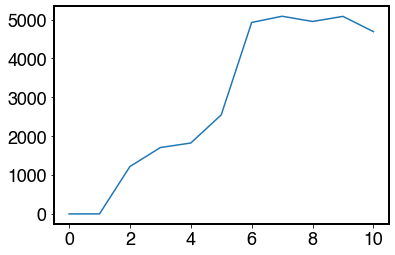

In [ ]:
plt.plot(trigger_det_efficiency_x,trigger_det_efficiency_y)

<Figure size 576x432 with 0 Axes>

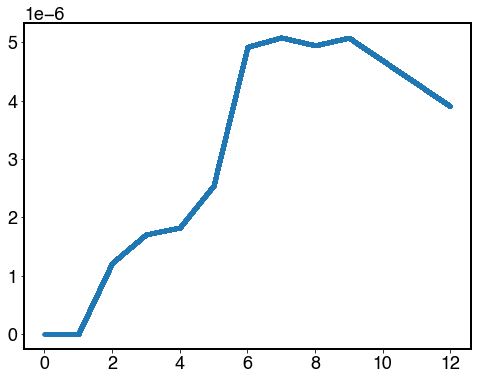

In [ ]:
fig_pre_def()

fig = fig_pre_def(8,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

interpoplation_axis= np.arange(0,12,0.0001) # unit 0.0001 # times 10000

interpolation_func  = interp1d(trigger_det_efficiency_x,trigger_det_efficiency_y,fill_value="extrapolate") 
tri_det_eff_corrected_yaxis = interpolation_func(interpoplation_axis)/10**9
#efficiency_corrected_yaxis = np.round(efficiency_corrected_yaxis,3)
plt.plot(interpoplation_axis,tri_det_eff_corrected_yaxis,'.',label = 'detection efficiency')

#fig_post_def(xlim=(0,12),ylim=(0,0.6),xlabel='neutron energy (MeV)',ylabel='efficiency')

In [ ]:
N_Eth_PE_eff_tri=[]
for i in np.arange(0,len(N_Eth_PE_eff[:,0]),1):
    if N_Eth_PE_eff[i,0]>12 or N_Eth_PE_eff[i,0]<2:
        continue
    index = int(N_Eth_PE_eff[i,0]*10000)
    #print(neutron_E_threshold_selected[i,4],' ',index,' ',lightoutput_2inches_inter[index])
    
    N_Eth_PE_eff_tri_temp = np.append(N_Eth_PE_eff[i,:],tri_det_eff_corrected_yaxis[index])

    if i ==0:
        N_Eth_PE_eff_tri = N_Eth_PE_eff_tri_temp.copy()
    else:
        N_Eth_PE_eff_tri = np.vstack((N_Eth_PE_eff_tri,N_Eth_PE_eff_tri_temp))
print('Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ eff')
print(N_Eth_PE_eff_tri)

Energy/      PSD/       LO/        Channel/   LO@tri. det./ Pdep tri det/ eff
[[3.33217028e+00 3.79603000e-01 6.55521000e-01 ... 2.18205187e+00
  4.93706474e-01 1.74651787e-06]
 [2.18353977e+00 3.68705000e-01 3.44164000e-01 ... 2.03986576e+00
  5.38687782e-01 1.30881318e-06]
 [5.71084787e+00 3.56657000e-01 2.27358700e+00 ... 1.91099469e+00
  4.11151020e-01 4.23659048e-06]
 ...
 [6.69805363e+00 3.51042000e-01 1.18848000e+00 ... 3.16716598e+00
  3.91167377e-01 5.03586262e-06]
 [2.35018758e+00 3.06748000e-01 2.01794000e-01 ... 1.42959747e+00
  5.36180967e-01 1.39023205e-06]
 [6.16713998e+00 3.04217000e-01 6.16524000e-01 ... 1.35625797e+00
  4.02202058e-01 4.95060879e-06]]


In [ ]:
print(N_Eth_PE_eff_tri.shape)
print(N_Eth_PE_eff_tri[0,:])

(12163, 8)
[3.33217028e+00 3.79603000e-01 6.55521000e-01 4.00000000e+00
 5.28380000e-01 2.18205187e+00 4.93706474e-01 1.74651787e-06]


In [ ]:
bin_width=0.2
spectrum_x = np.arange(0,20,bin_width)
spectrum_hist = np.zeros(len(spectrum_x))
#plt.plot(spectrum_x,spectrum_hist)

In [ ]:
for i in np.arange(0,len(N_Eth_PE_eff_tri[:,0]),1):
    E_tot = N_Eth_PE_eff_tri[i,0]+N_Eth_PE_eff_tri[i,5]
    spectrum_hist[int(E_tot*(bin_width**-1))] += (N_Eth_PE_eff_tri[i,6])**-1+(N_Eth_PE_eff_tri[i,7])**-1
print(spectrum_hist)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.86836055e+06 6.12486605e+07
 2.02991503e+08 2.42244904e+08 2.73399253e+08 2.96208074e+08
 3.17611798e+08 3.43256667e+08 3.49068296e+08 3.69220723e+08
 3.78595730e+08 3.70924282e+08 3.43021315e+08 3.29016340e+08
 2.94004017e+08 2.47710287e+08 2.11018016e+08 1.98158846e+08
 1.76925268e+08 1.49881239e+08 1.63508282e+08 1.57450460e+08
 1.25651147e+08 1.18669149e+08 1.13234802e+08 7.95103262e+07
 6.53391665e+07 5.46521128e+07 4.49219449e+07 3.61024808e+07
 3.54397809e+07 3.24372950e+07 2.97574398e+07 2.94509922e+07
 2.27951777e+07 1.79526899e+07 1.23849163e+07 9.11405800e+06
 7.89506168e+06 4.29219889e+06 3.67092204e+06 2.72586559e+06
 3.16775646e+06 3.06345765e+06 1.13264138e+06 1.10795951e+06
 1.83663708e+06 1.17982093e+06 1.42047572e+06 2.49284848e+05
 7.60123344e+05 2.533585

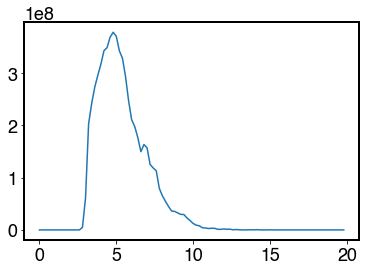

In [ ]:
plt.plot(spectrum_x,spectrum_hist)

(0.0, 1.2)

<Figure size 576x432 with 0 Axes>

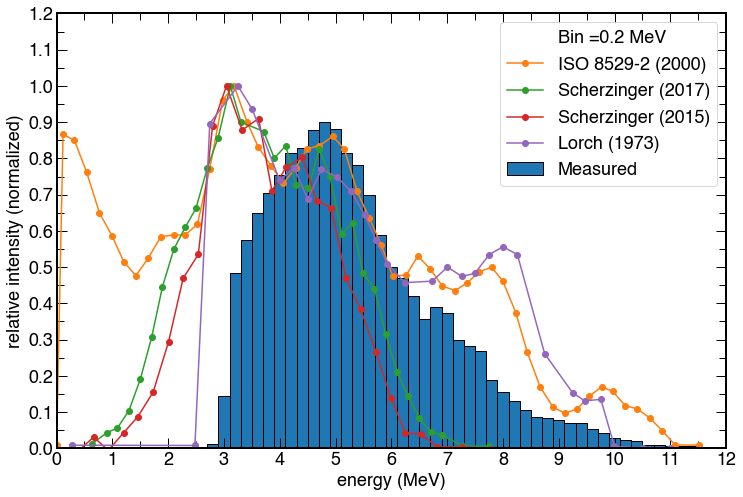

In [284]:

fig_pre_def()

fig = fig_pre_def(12,8,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin ='+str(bin_width)+ ' MeV')
plt.plot()
#ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'TOF measured')
plt.bar(spectrum_x,0.9*spectrum_hist/spectrum_hist[10:].max(),width=bin_width,edgecolor = "k",label = 'Measured')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

fig_post_def(x_ma=1,x_mi=0.5,y_ma=0.1,y_mi=0.05,xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,12)
plt.ylim(0,1.2)

In [204]:
print(angle)

[18.65307599 17.77849783 21.85401727 21.33730582 19.46633012 22.15403071
 16.86298276 16.8765386  21.1537847  26.32216813 31.90536811 16.80607565
 19.43029216 20.71759051 23.59975897 18.16976614 16.96267238 23.11895412
 21.80356128 19.25065756 19.14097106 33.31081315 16.97348041 19.98195987
 57.50353968 17.37108792 43.99546855 30.62055476 37.8160376  18.64793223
 23.29090476 23.30508355 25.09757344 18.58765973 18.94337652 16.77897527
 17.58269787 21.40254763 19.01511582 30.25602488 19.76099177 17.42550129
 18.49650028 22.93661047 20.48422535 19.69308388 26.06125481 19.98742951
 18.45241514 18.38808956 17.88813221 17.46845747 36.68655052 22.20351414
 18.79080386 19.03579198 23.65030654 18.81752255 19.2124484  26.48708093
 19.18502531 20.46620252 23.65098391 17.13649787 20.43194063 19.98041106
 21.25413289 20.31628897 19.04278929 23.07289308 21.82292425 21.57926615
 22.94557525 17.86624479 19.82365319 21.88125931 20.18202342 17.26901043
 20.06514831 20.49103981 40.15236552 19.02700698 19

In [205]:
N_Eth_PE_eff[0,:]

array([3.33217028, 0.379603  , 0.655521  , 4.        , 0.52838   ,
       2.18205187, 0.49370647])

In [206]:
j=0
E_tot = N_Eth_PE_eff[j,0]+N_Eth_PE_eff[j,5]
print('E_tot ',E_tot)
E_n_s = N_Eth_PE_eff[j,0]
print('E_n_s ',E_n_s)
angle_temp = math.degrees(math.acos((E_tot/E_n_s)**-0.5))
print(angle_temp)

E_tot  5.514222153589538
E_n_s  3.3321702828542077
38.980627301447655


In [207]:
math.acos(0.2)

1.3694384060045657

In [256]:
math.cos(math.radians(60)) 

0.5000000000000001

In [250]:
math.degrees(math.acos(0.2))

78.46304096718451

In [255]:
print(math.cos(math.radians(60)))

0.5000000000000001


In [ ]:
fig_pre_def()

fig = fig_pre_def(8,6) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

for ROI_E in np.arange(1,10,1):
    energy_selected = [0,0,0,0,0] 

    for j in np.arange(0,len(neutron_E_LO[:,0]),1):
        if neutron_E_LO[j,0] <ROI_E+0.5 and neutron_E_LO[j, 0]>ROI_E-0.5 :
            energy_selected=np.vstack((energy_selected,neutron_E_LO[j,:]))
    #print(energy_selected)
    energy_selected = energy_selected[1:,:]
    axis_LO, hist_LO = sorting(energy_selected[:,4],100,0,5)
    ax.plot(axis_LO, hist_LO,label=str(ROI_E)+' MeV')

fig_post_def(xlim=(0,5),ylim=(0,370))    
plt.legend(fontsize = 18, title_fontsize=18,title = '$E_n\'$')

# print(energy_selected)

## efficiency correction

In [163]:
efficiency = np.loadtxt('../detection_efficiency/3"EJ309_150cm/output/20220211_efficiency.txt')

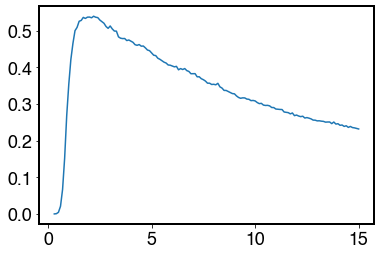

In [164]:
plt.plot(efficiency[:,0],efficiency[:,1])

In [165]:
axis_neutron_noncor, hist_neutron_noncor = sorting(neutron_E_threshold_selected[:,0],100,0,10)

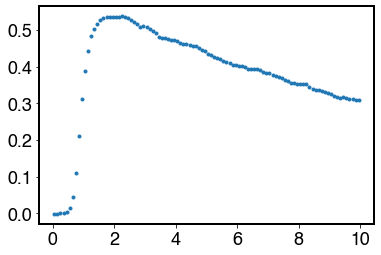

In [166]:
interpolation_func  = interp1d(efficiency[:,0],efficiency[:,1],fill_value="extrapolate") 
efficiency_corrected_yaxis = interpolation_func(axis_neutron_noncor)
efficiency_corrected_yaxis = np.round(efficiency_corrected_yaxis,3)
plt.plot(axis_neutron_noncor,efficiency_corrected_yaxis,'.')

(0.0, 10.0)

<Figure size 576x432 with 0 Axes>

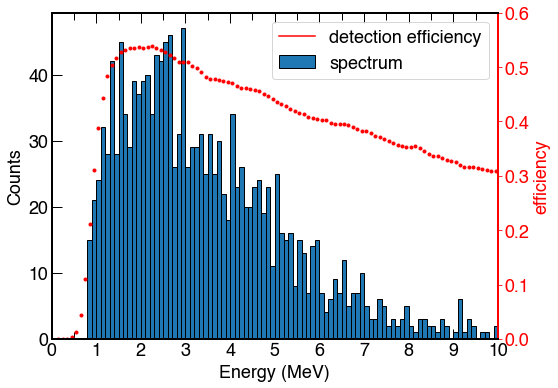

In [167]:
fig_pre_def()

fig = fig_pre_def() # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 


ax.bar(axis_neutron_noncor, hist_neutron_noncor,width=0.1,edgecolor = "k",label= 'spectrum')
ax.plot([],[],'r',label ='detection efficiency')
ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(x_ma=1,x_mi=0.5)
plt.legend(fontsize=18)
plt.xlim(0,)


ax2= ax.twinx()

ax2.plot(axis_neutron_noncor,efficiency_corrected_yaxis,'.r')
ax2.set_ylabel("efficiency",fontsize=18)
ax2.spines['right'].set_color('red')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')
#fig_post_def(y_ma=0.1,y_mi=0.05)
plt.ylim(0,0.6)
plt.xlim(0,10)


In [168]:
print(axis_neutron_noncor)
print(efficiency_corrected_yaxis)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95 3.05 3.15 3.25 3.35 3.45 3.55 3.65 3.75 3.85 3.95 4.05 4.15
 4.25 4.35 4.45 4.55 4.65 4.75 4.85 4.95 5.05 5.15 5.25 5.35 5.45 5.55
 5.65 5.75 5.85 5.95 6.05 6.15 6.25 6.35 6.45 6.55 6.65 6.75 6.85 6.95
 7.05 7.15 7.25 7.35 7.45 7.55 7.65 7.75 7.85 7.95 8.05 8.15 8.25 8.35
 8.45 8.55 8.65 8.75 8.85 8.95 9.05 9.15 9.25 9.35 9.45 9.55 9.65 9.75
 9.85 9.95]
[-0.002 -0.001 -0.     0.     0.003  0.013  0.044  0.11   0.211  0.311
  0.388  0.443  0.483  0.504  0.517  0.527  0.532  0.535  0.535  0.537
  0.536  0.537  0.538  0.536  0.532  0.527  0.522  0.516  0.509  0.51
  0.509  0.502  0.499  0.491  0.481  0.479  0.479  0.476  0.474  0.473
  0.47   0.465  0.461  0.461  0.46   0.458  0.456  0.45   0.446  0.442
  0.436  0.433  0.428  0.423  0.42   0.416  0.413  0.409  0.406  0.405
  0.402  0.402  0.398  0.395  0.395  0.395  0.394  0.39   0.386  0

In [169]:
efficiency_corrected_yaxis[:4]=0 

In [183]:
#thresholo_at_axis = 

neutron_spectrum = hist_neutron_noncor/efficiency_corrected_yaxis

<ipython-input-183-72e4b8ab831d>:3: RuntimeWarning: invalid value encountered in true_divide
  neutron_spectrum = hist_neutron_noncor/efficiency_corrected_yaxis


In [185]:
neutron_spectrum=[]
for i in np.arange(0,len(hist_neutron_noncor),1):
    if i < 6:
        print(i,efficiency_corrected_yaxis[i])
        neutron_spectrum = np.append(neutron_spectrum,0)
    else:
        #print(i)
        neutron_spectrum = np.append(neutron_spectrum,hist_neutron_noncor[i]/efficiency_corrected_yaxis[i])

0 0.0
1 0.0
2 0.0
3 0.0
4 0.003
5 0.013


29


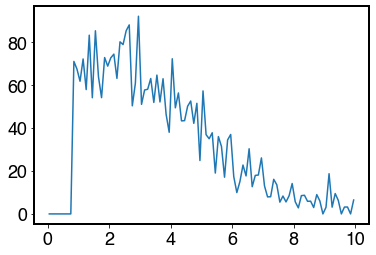

In [186]:
plt.plot(axis_neutron_noncor,neutron_spectrum)
print(np.argmax(neutron_spectrum))

(0.0, 1.05)

<Figure size 576x432 with 0 Axes>

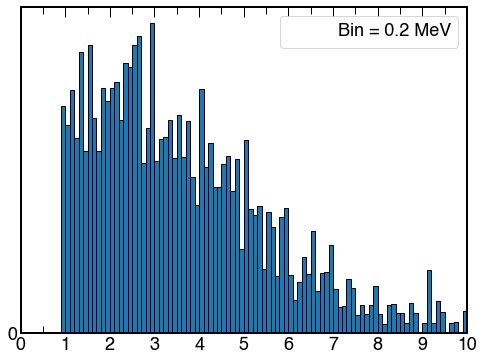

In [179]:
fig_pre_def()

fig = fig_pre_def() # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 0.2 MeV')
#ax.bar(Neutron_E_axis, Neutron_energy_counts, label= 'non-corrected efficiency')
plt.bar(axis_neutron_noncor,neutron_spectrum/neutron_spectrum.max(),width=0.1,edgecolor = "k")


#plt.plot(Neutron_E_axis, Neutron_energy_counts/Neutron_energy_counts.max(),'-')
fig_post_def(x_ma=1,x_mi=0.5,y_ma=200,y_mi=100)

plt.xlim(0,10)
plt.ylim(0,)

(0.0, 49.35)

<Figure size 576x432 with 0 Axes>

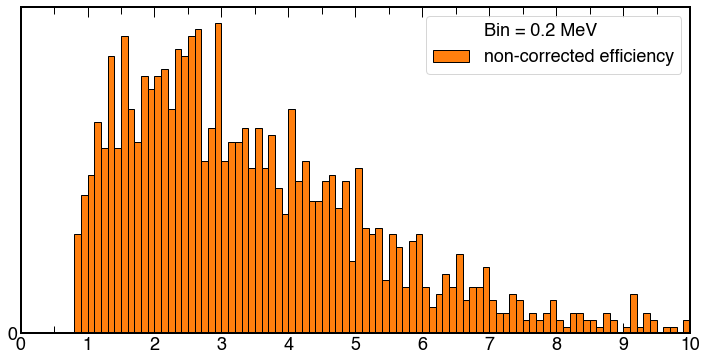

In [180]:

fig_pre_def()

fig = fig_pre_def(12,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 0.2 MeV')

ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'non-corrected efficiency')

fig_post_def(x_ma=1,x_mi=0.5,y_ma=100,y_mi=50)

plt.xlim(0,10)
plt.ylim(0,)

In [66]:
ISO_spectrum = np.loadtxt('Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('Neutron_spectrum/Scherzinger_2015.txt')

(0.0, 1.2)

<Figure size 576x432 with 0 Axes>

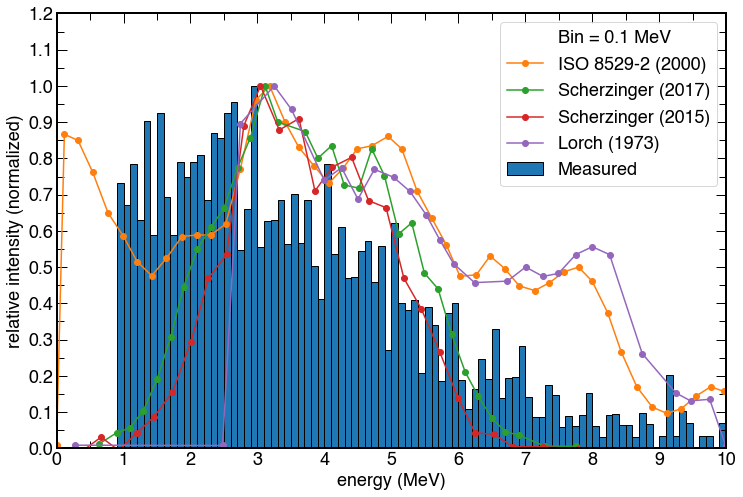

In [182]:

fig_pre_def()

fig = fig_pre_def(12,8,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 0.1 MeV')

#ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'TOF measured')
plt.bar(axis_neutron_noncor,neutron_spectrum/neutron_spectrum[10:].max(),width=0.1,edgecolor = "k",label = 'Measured')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

fig_post_def(x_ma=1,x_mi=0.5,y_ma=0.1,y_mi=0.05,xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(0,1.2)

# considering the time resolution

In [187]:
testlist = np.array((0.9,1.2,3.5,4,4.9,5.1,5.7,6.6,6))
print(testlist)

[0.9 1.2 3.5 4.  4.9 5.1 5.7 6.6 6. ]


In [188]:
testlist_2 = np.round(testlist/2)*2
print(testlist_2)

[0. 2. 4. 4. 4. 6. 6. 6. 6.]


In [189]:
resolution_time = 2 #ns

neutron_E_threshold_selected_time = neutron_time_threshold_selected.copy()
neutron_E_threshold_selected_time[:,0] = np.round(neutron_E_threshold_selected_time[:,0]/resolution_time)*resolution_time  
#print(neutron_E_threshold_selected_time)
Neutron_t_axis, Neutron_t_counts=sorting(
    neutron_E_threshold_selected_time[:,0], int(100/resolution_time) , 1, 101)


In [190]:
for i in np.arange(0,len(Neutron_t_axis),1):
    #print(i, Time_to_energy(Neutron_t_axis[i]))
    if Time_to_energy(Neutron_t_axis[i]) <10 :
        cut_point = i
        break
print(i, Time_to_energy(Neutron_t_axis[i]))

17 9.069819074231797


<ipython-input-150-b2d86adb69f1>:12: RuntimeWarning: invalid value encountered in double_scalars
  neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)


(0.0, 10.0)

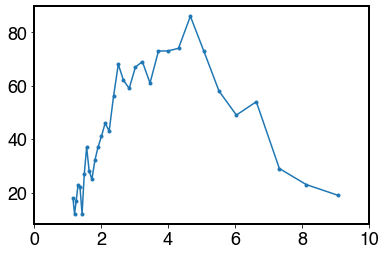

In [191]:
Neutron_E_axis = Time_to_energy(Neutron_t_axis[cut_point:])
plt.plot(Neutron_E_axis,Neutron_t_counts[cut_point:],'.-')
plt.xlim(0,10)
#print(Neutron_E_axis_2ns)

In [192]:
print(Neutron_E_axis)

[9.06981907 8.12794075 7.3260301  6.63757908 6.04208842 5.5235
 5.06908756 4.66865847 4.31397035 3.99829902 3.71611426 3.46283371
 3.2346341  3.02830499 2.84113437 2.67081849 2.51539021 2.37316153
 2.24267737 2.12267798 2.01206826 1.90989258 1.81531398 1.72759688
 1.64609272 1.57022782 1.4994933  1.43343644 1.37165342 1.3137831
 1.25950171 1.20851834 1.16057095]


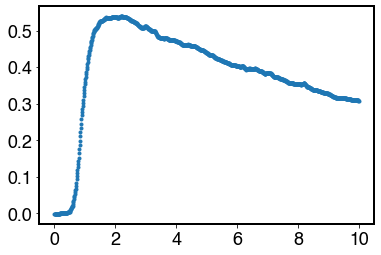

In [193]:
efficiency_for_time = np.arange(0,10,0.01)

interpolation_func  = interp1d(efficiency[:,0],efficiency[:,1],fill_value="extrapolate") 
efficiency_corrected_yaxis_for_t = interpolation_func(efficiency_for_time)
plt.plot(efficiency_for_time,efficiency_corrected_yaxis_for_t,'.')

In [194]:
print(Neutron_E_axis)

[9.06981907 8.12794075 7.3260301  6.63757908 6.04208842 5.5235
 5.06908756 4.66865847 4.31397035 3.99829902 3.71611426 3.46283371
 3.2346341  3.02830499 2.84113437 2.67081849 2.51539021 2.37316153
 2.24267737 2.12267798 2.01206826 1.90989258 1.81531398 1.72759688
 1.64609272 1.57022782 1.4994933  1.43343644 1.37165342 1.3137831
 1.25950171 1.20851834 1.16057095]


In [195]:
efficiency_E_axis = np.round(Neutron_E_axis,2)

efficiency_E_x_axis_selected = efficiency_E_axis*100
efficiency_E_x_axis_selected = efficiency_E_x_axis_selected.astype(int)
print(len(efficiency_E_x_axis_selected))
#plt.plot(efficiency_E_x_axis_selected)

33


In [196]:
efficiency_E_selected = efficiency_corrected_yaxis_for_t[efficiency_E_x_axis_selected]
print(len(efficiency_E_selected))

33


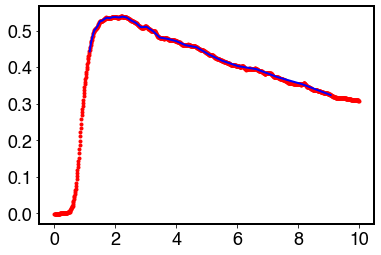

In [197]:

plt.plot(efficiency_for_time,efficiency_corrected_yaxis_for_t,'.r')
plt.plot(Neutron_E_axis,efficiency_E_selected,'b',linewidth=2)

In [198]:
Neutron_counts_time_selected= Neutron_t_counts[cut_point:]/efficiency_E_selected

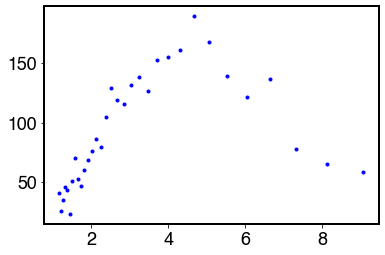

In [199]:
plt.plot(Neutron_E_axis,Neutron_counts_time_selected,'.b')

In [200]:
print(len(Neutron_E_axis))

33


In [201]:
Neutron_E_axis_length=[]
for i in np.arange(0,len(Neutron_E_axis),1):
    #print(i,'total')
    if int(i) == 0:
        #print(i,'first')
        Neutron_E_axis_length = np.append(Neutron_E_axis_length,Neutron_E_axis[i]-Neutron_E_axis[i+1])
        
    elif i == len(Neutron_E_axis)-1:
        #print(i, 'here')
        Neutron_E_axis_length = np.append(Neutron_E_axis_length,Neutron_E_axis[i-1]-Neutron_E_axis[i])
        
    else:
        #print(i)
        half_pre_length   = (Neutron_E_axis[i-1]-Neutron_E_axis[i])/2
        half_after_length = (Neutron_E_axis[i]-Neutron_E_axis[i+1])/2
        Neutron_E_axis_length = np.append(Neutron_E_axis_length,half_pre_length+half_after_length)
    
print(Neutron_E_axis_length)

[0.94187832 0.87189449 0.74518084 0.64197084 0.55703954 0.48650043
 0.42742076 0.37755861 0.33517972 0.29892805 0.26773266 0.24074008
 0.21726436 0.19674987 0.17874325 0.16287208 0.14882848 0.13635642
 0.12524177 0.11530456 0.1063927  0.09837714 0.09114785 0.08461063
 0.07868453 0.07329971 0.06839569 0.06391994 0.05982667 0.05607585
 0.05263238 0.04946538 0.04794739]


(0.0, 0.6)

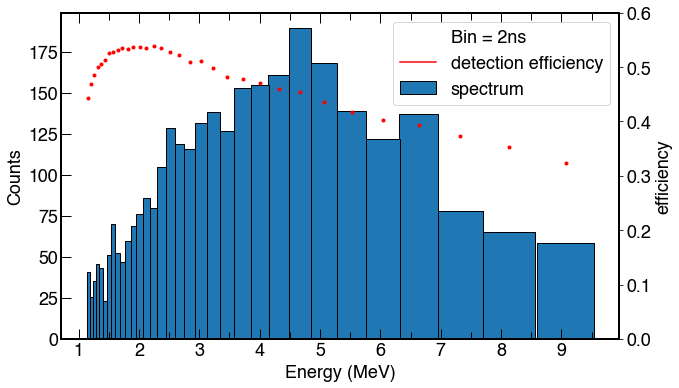

In [202]:

fig = fig_pre_def(10,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[],' ',label ='Bin = 2ns')
ax.bar(Neutron_E_axis,Neutron_counts_time_selected,Neutron_E_axis_length,edgecolor = "k",label= 'spectrum')
ax.plot([],[],'r',label ='detection efficiency')
ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(x_ma=1,x_mi=0.5)
plt.legend(fontsize=18)

ax2= ax.twinx()
ax2.plot(Neutron_E_axis,efficiency_E_selected,'.r')
#ax2.plot(axis_neutron_noncor,efficiency_corrected_yaxis,'.r')
ax2.set_ylabel("efficiency",fontsize=18)
plt.ylim(0,0.6)




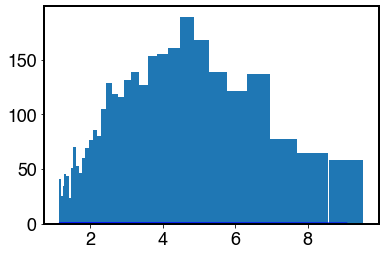

In [203]:
plt.bar(Neutron_E_axis,Neutron_counts_time_selected,Neutron_E_axis_length)
plt.plot(Neutron_E_axis,efficiency_E_selected,'b',linewidth=2)

In [204]:
Neutron_counts_xlength_normalized = Neutron_counts_time_selected/Neutron_E_axis_length

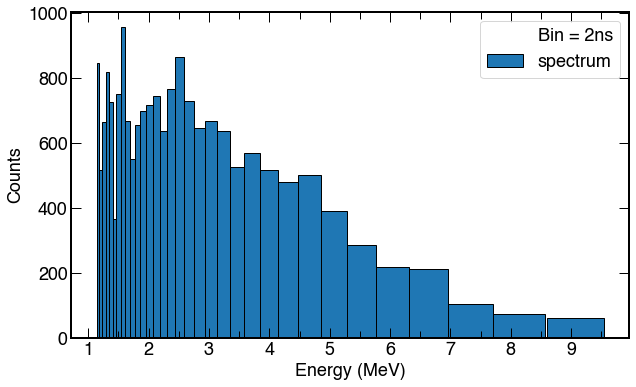

In [205]:
#plt.bar()

fig = fig_pre_def(10,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[],' ',label ='Bin = 2ns')
ax.bar(Neutron_E_axis,Neutron_counts_xlength_normalized,Neutron_E_axis_length,edgecolor='k',label= 'spectrum')
#ax.plot([],[],'r',label ='detection efficiency')
ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(x_ma=1,x_mi=0.5)
plt.legend(fontsize=18)

#ax2= ax.twinx()
#ax2.plot(Neutron_E_axis,efficiency_E_selected,'.r')
#ax2.plot(axis_neutron_noncor,efficiency_corrected_yaxis,'.r')
#ax2.set_ylabel("efficiency",fontsize=18)
#plt.ylim(0,0.6)

(0.0, 1.2)

<Figure size 576x432 with 0 Axes>

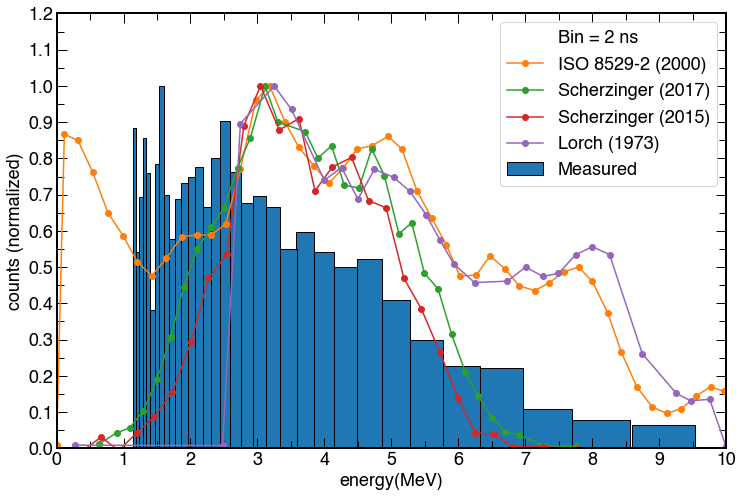

In [206]:

fig_pre_def()

fig = fig_pre_def(12,8,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 2 ns')

#ax.hist(neutron_E_threshold_selected[:,0],bins=100,edgecolor='black',range=(0,10), label= 'TOF measured')
#plt.plot(Neutron_E_axis,Neutron_counts_xlength_normalized/Neutron_counts_xlength_normalized.max(),'o-r')
plt.bar(Neutron_E_axis,Neutron_counts_xlength_normalized/Neutron_counts_xlength_normalized.max(),Neutron_E_axis_length,edgecolor = "k",label='Measured')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-',label='Scherzinger (2017)')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')

fig_post_def(x_ma=1,x_mi=0.5,y_ma=0.1,y_mi=0.05,xlabel='energy(MeV)',ylabel='counts (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(0,1.2)

In [452]:
# sorting the time to 2 ns

neutron_E_threshold_selected_2ns = neutron_time_threshold_selected.copy()
neutron_E_threshold_selected_2ns[:,0] = np.round(neutron_E_threshold_selected_2ns[:,0]/2)*2  
print(neutron_E_threshold_selected_2ns)


[[46.        0.360825  1.320946  4.      ]
 [44.        0.36736   0.982353  4.      ]
 [70.        0.368902  0.203032  6.      ]
 ...
 [66.        0.383333  0.22284   6.      ]
 [68.        0.364148  0.770036  6.      ]
 [46.        0.355892  0.777464  6.      ]]


In [307]:
Neutron_t_axis_2ns, Neutron_t_counts_2ns=sorting(
    neutron_E_threshold_selected_2ns[:,0], 50 , 1, 101)
print(Neutron_t_axis_2ns)
print(Neutron_t_counts_2ns)

[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100.]
[   0    0    0    0    0    0    0    0    0    5   18    5    2    5
    3    5    7   24   61  168  439  729  953 1057 1008  923  845  806
  856  798  709  566  404  377  318  294  244  206  192  168  140  116
   86   78   70   75   63   64   55   33]


[9.06981907 8.12794075 7.3260301  6.63757908 6.04208842 5.5235
 5.06908756 4.66865847 4.31397035 3.99829902 3.71611426 3.46283371
 3.2346341  3.02830499 2.84113437 2.67081849 2.51539021 2.37316153
 2.24267737 2.12267798 2.01206826 1.90989258 1.81531398 1.72759688
 1.64609272 1.57022782 1.4994933  1.43343644 1.37165342 1.3137831
 1.25950171 1.20851834 1.16057095]


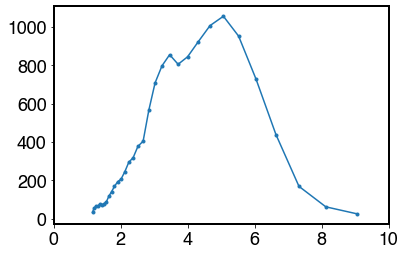

In [334]:
Neutron_E_axis_2ns = Time_to_energy(Neutron_t_axis_2ns[17:])
plt.plot(Neutron_E_axis_2ns,Neutron_t_counts_2ns[17:],'.-')
plt.xlim(0,10)
print(Neutron_E_axis_2ns)

In [335]:
efficiency_for_time = np.arange(0,10,0.1)
print(efficiency_for_time)
interpolation_func  = interp1d(efficiency[:,0],efficiency[:,1],fill_value="extrapolate") 
efficiency_corrected_yaxis_for_t = interpolation_func(efficiency_for_time)
print(efficiency_corrected_yaxis_for_t)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[-1.81356172e-03 -1.18657125e-03 -5.59580774e-04  6.74097006e-05
  6.94400176e-04  4.43399015e-03  2.09506525e-02  6.69108557e-02
  1.52471372e-01  2.68564142e-01  3.53869751e-01  4.21208258e-01
  4.65186021e-01  4.99969702e-01  5.08962863e-01  5.25654626e-01
  5.28005146e-01  5.36222016e-01  5.33377268e-01  5.36872804e-01
  5.37170651e-01  5.35183195e-01  5.39380305e-01  5.36688323e-01
  5.35675636e-01  5.29022992e-01  5.24603379e-01  5.20182417e-01
  5.11341207e-01  5.06385961e-01  5.12799347e-01  5.04832763e-01
  4.99074938e-01  4.98684926e-01  4.83175728e-01  4.79497781e-01
  4.7840

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
0.5127993474512266
0.43921862710544607


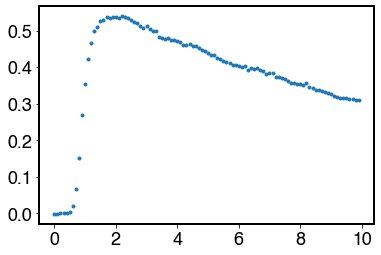

In [355]:
plt.plot(efficiency_for_time,efficiency_corrected_yaxis_for_t,'.')
print(efficiency_for_time)
print(efficiency_corrected_yaxis_for_t[30])
print(efficiency_corrected_yaxis_for_t[50])

In [341]:
efficiency_2ns_x_axis = np.round(Neutron_E_axis_2ns,1)
print(efficiency_2ns_x_axis)
efficiency_2ns_x_axis_selected = efficiency_2ns_x_axis*10
efficiency_2ns_x_axis_selected = efficiency_2ns_x_axis_selected.astype(int)
print(efficiency_2ns_x_axis_selected)

[9.1 8.1 7.3 6.6 6.  5.5 5.1 4.7 4.3 4.  3.7 3.5 3.2 3.  2.8 2.7 2.5 2.4
 2.2 2.1 2.  1.9 1.8 1.7 1.6 1.6 1.5 1.4 1.4 1.3 1.3 1.2 1.2]
[91 81 73 66 60 55 51 47 43 40 37 35 32 30 28 27 25 24 22 21 20 19 18 17
 16 16 15 14 14 13 13 12 12]


In [342]:
efficiency_2ns = efficiency_corrected_yaxis_for_t[efficiency_2ns_x_axis_selected]
print(efficiency_2ns)

[0.32198329 0.3523546  0.37428468 0.39665409 0.40354047 0.41794871
 0.43310766 0.45305381 0.46007761 0.47137359 0.47867122 0.47949778
 0.49907494 0.51279935 0.51134121 0.52018242 0.52902299 0.53567564
 0.53938031 0.53518319 0.53717065 0.5368728  0.53337727 0.53622202
 0.52800515 0.52800515 0.52565463 0.50896286 0.50896286 0.4999697
 0.4999697  0.46518602 0.46518602]


In [344]:
Neutron_counts_2ns= Neutron_t_counts_2ns[17:]*efficiency_2ns

In [353]:
print(Neutron_E_axis_2ns)
print(Neutron_counts_2ns/Neutron_counts_2ns.max())
print(Neutron_t_counts_2ns)
print(efficiency_2ns)

[9.06981907 8.12794075 7.3260301  6.63757908 6.04208842 5.5235
 5.06908756 4.66865847 4.31397035 3.99829902 3.71611426 3.46283371
 3.2346341  3.02830499 2.84113437 2.67081849 2.51539021 2.37316153
 2.24267737 2.12267798 2.01206826 1.90989258 1.81531398 1.72759688
 1.64609272 1.57022782 1.4994933  1.43343644 1.37165342 1.3137831
 1.25950171 1.20851834 1.16057095]
[0.01688005 0.04695036 0.13735374 0.38036942 0.64260452 0.87005165
 1.         0.997561   0.92760258 0.87006381 0.84275533 0.89658096
 0.86995703 0.79418713 0.63220273 0.45905654 0.43565735 0.37209871
 0.34639496 0.28524723 0.24171781 0.22516546 0.195737   0.16398413
 0.1337905  0.09918951 0.08956209 0.07782395 0.08338281 0.06880395
 0.06989608 0.05588799 0.03353279]
[   0    0    0    0    0    0    0    0    0    5   18    5    2    5
    3    5    7   24   61  168  439  729  953 1057 1008  923  845  806
  856  798  709  566  404  377  318  294  244  206  192  168  140  116
   86   78   70   75   63   64   55   33]
[0.3219832

(0.0, 1.0502821004176988)

<Figure size 576x432 with 0 Axes>

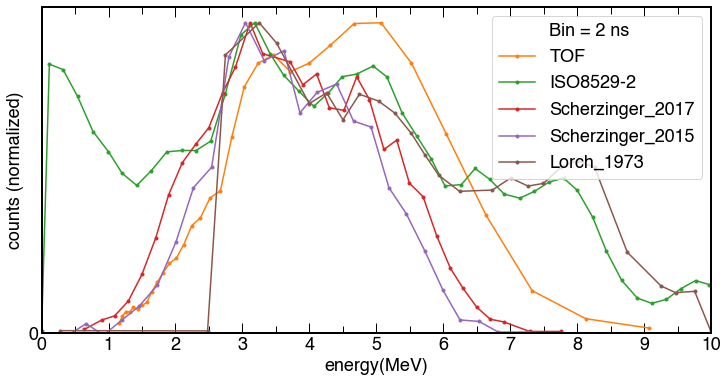

In [350]:

fig_pre_def()

fig = fig_pre_def(12,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 2 ns')

plt.plot(Neutron_E_axis_2ns,Neutron_counts_2ns[:]/Neutron_counts_2ns.max(),'.-',label='')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'.-',label='ISO8529-2')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'.-',label='Scherzinger_2017')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'.-',label='Scherzinger_2015')
plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'.-',label='Lorch_1973')
fig_post_def(x_ma=1,x_mi=0.5,y_ma=100,y_mi=50,xlabel='energy(MeV)',ylabel='counts (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(0,)

In [ ]:
Neutron_E_axis_2ns



In [312]:
# sorting the time to 1 ns

neutron_E_threshold_selected_1ns = neutron_time_threshold_selected.copy()
neutron_E_threshold_selected_1ns[:,0] = np.round(neutron_E_threshold_selected_1ns[:,0])
print(neutron_E_threshold_selected_1ns)
Neutron_t_axis_1ns, Neutron_t_counts_1ns=sorting(
    neutron_E_threshold_selected_1ns[:,0], 50 , 1, 101)
print(Neutron_t_axis_1ns)
print(Neutron_t_counts_1ns)


[[46.        0.360825  1.320946  4.      ]
 [45.        0.36736   0.982353  4.      ]
 [70.        0.368902  0.203032  6.      ]
 ...
 [66.        0.383333  0.22284   6.      ]
 [69.        0.364148  0.770036  6.      ]
 [46.        0.355892  0.777464  6.      ]]
[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100.]
[   0    0    0    0    0    0    0    0    0    3   15   10    0    6
    3    5    5   20   44  136  347  680  889 1079 1025  931  871  809
  828  807  764  580  445  382  328  315  253  216  196  160  155  115
   94   77   78   76   58   67   60   43]


[37.96781878 30.39416853 24.90409503 20.79120591 17.62710171 15.13894273
 13.14591286 11.52415782 10.18643883  9.06981907  8.12794075  7.3260301
  6.63757908  6.04208842  5.5235      5.06908756  4.66865847  4.31397035
  3.99829902  3.71611426  3.46283371  3.2346341   3.02830499  2.84113437
  2.67081849  2.51539021  2.37316153  2.24267737  2.12267798  2.01206826
  1.90989258  1.81531398  1.72759688  1.64609272  1.57022782  1.4994933
  1.43343644  1.37165342  1.3137831   1.25950171  1.20851834  1.16057095]


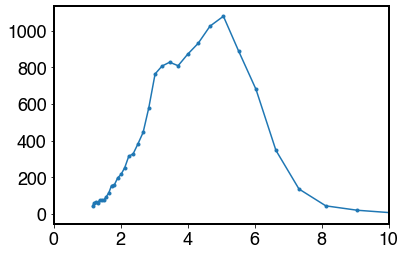

In [315]:
Neutron_E_axis_1ns = Time_to_energy(Neutron_t_axis_1ns[8:])
plt.plot(Neutron_E_axis_1ns,Neutron_t_counts_1ns[8:],'.-')
plt.xlim(0,10)
print(Neutron_E_axis_1ns)

(0.0, 1.0502821004176988)

<Figure size 576x432 with 0 Axes>

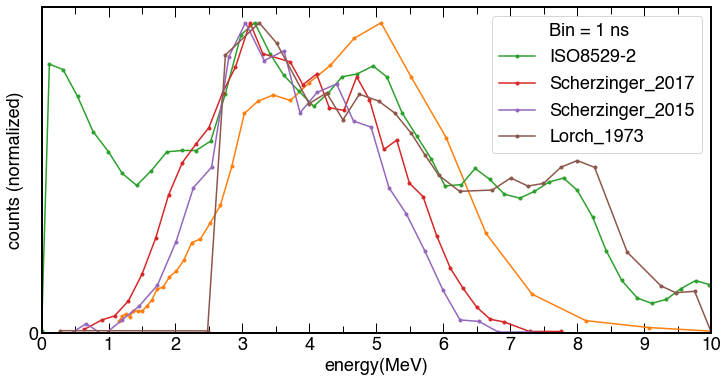

In [317]:

fig_pre_def()

fig = fig_pre_def(12,6,18) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 

ax.plot([],[] ,' ', label= 'Bin = 1 ns')

plt.plot(Neutron_E_axis_1ns,Neutron_t_counts_1ns[8:]/Neutron_t_counts_1ns.max(),'.-')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'.-',label='ISO8529-2')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'.-',label='Scherzinger_2017')
plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'.-',label='Scherzinger_2015')
plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'.-',label='Lorch_1973')
fig_post_def(x_ma=1,x_mi=0.5,y_ma=100,y_mi=50,xlabel='energy(MeV)',ylabel='counts (normalized)')
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.ylim(0,)

# Extract the certain response function at certain energy 

In [1255]:
print(Time_to_energy(72))
print(Time_to_energy(76))
print(Time_to_energy(80))

2.242677371098682
2.012068260034739
1.8153139804811806


In [1451]:
E_for_response_selection = np.array((0.95,1.05))
Energy_to_time_wo_realitistic(E_for_response_selection)


array([110.42460663, 105.0347519 ])

In [ ]:
neutron_PSD_Tdelay_LO_corrected

In [1600]:
energy_selection = 5
E_for_response_selection = np.array((energy_selection-0.2,energy_selection+0.2))
T_for_response_selection =  Energy_to_time_wo_realitistic(E_for_response_selection)

print(T_for_response_selection)
#neutron_PSD_region = neutron_PSD_region[1:]

[49.12550692 47.19826036]


# for E

neutron_PSD_region =[0,0,0,0]

for i in np.arange(0,len(neutron_E_threshold_selected[:,0]),1):
     if (neutron_E_threshold_selected[i,0] < (energy_selection+0.5) 
         and 
         (neutron_E_threshold_selected[i,0]> (energy_selection-0.5))):
            neutron_PSD_region = np.vstack((neutron_PSD_region,neutron_E_threshold_selected[i,:]))


In [1601]:
#for T 

neutron_PSD_region =[0,0,0,0]

for i in np.arange(0,len(neutron_PSD_Tdelay_corrected[:,0]),1):
     if (neutron_PSD_Tdelay_corrected[i,0] < T_for_response_selection[0]
         and 
         neutron_PSD_Tdelay_corrected[i,0]> T_for_response_selection[1]):
            neutron_PSD_region = np.vstack((neutron_PSD_region,neutron_PSD_Tdelay_corrected[i,:]))



In [1602]:
axis, hist_neutron_region_corr = sorting(neutron_PSD_region[:,2],1000,0,10000)

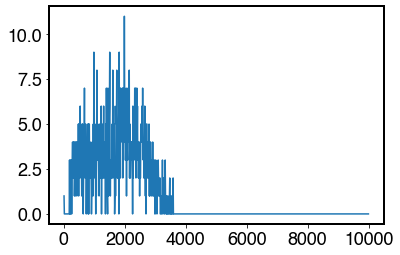

In [1603]:
plt.plot(axis, hist_neutron_region_corr )

In [1593]:
path = r'../detection_efficiency/3"EJ309_150cm/output/20220213_3inches_neutron_response_function.xlsx'

simulated_response=(pd.read_excel(path, sheet_name = 'response_function', index_col=None,header=0, engine = 'openpyxl')).values


In [1604]:
#energy = round(i/10+0.2,1)

response_energy = int((energy_selection-0.2)*10)


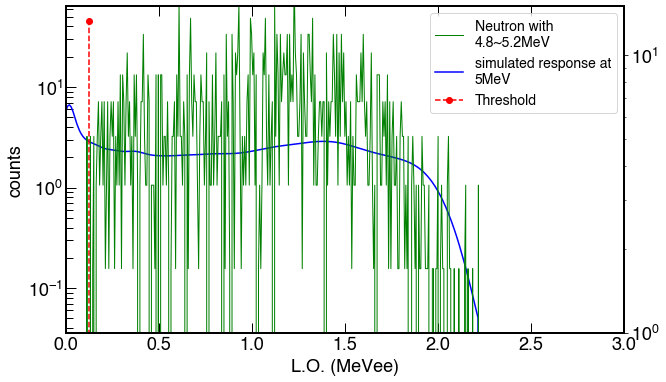

In [1607]:
#for T

fig = fig_pre_def(10,6) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111


ax.plot([],[],'g' ,linewidth=1,label ='Neutron with\n'+str(E_for_response_selection[0])+'~'+str(E_for_response_selection[1]) + 'MeV')
ax.plot(simulated_response[:,0], simulated_response[:,response_energy]*5000,'b',label='simulated response at\n'+str(energy_selection)+'MeV')
plt.plot([0.125, 0.125], [0, 45],'--r', marker = 'o',label='Threshold')
plt.yscale('log')
plt.xlim(0,3)
fig_post_def(ylabel ='counts' ,xlabel='L.O. (MeVee)')
plt.legend(loc='upper right',fontsize=14)

ax2 = ax.twinx()
ax2.plot(axis*0.000619, hist_neutron_region_corr*1.7,'g' ,linewidth=1)
plt.xlim(0,3)
#plt.xlim(-20,200)
plt.ylim(1,15)
plt.yscale('log')

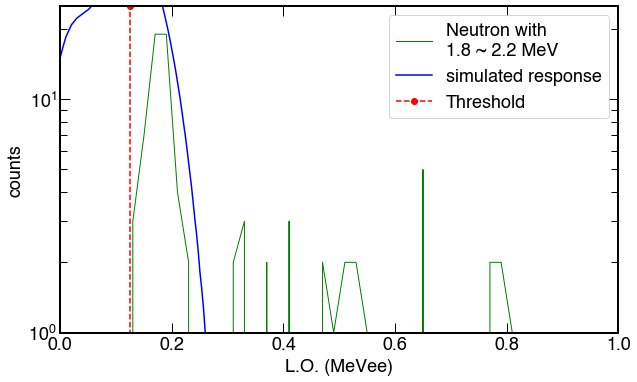

In [1480]:


fig = fig_pre_def(10,6) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111


ax.plot(axis, hist_neutron_region_corr,'g' ,linewidth=1,label ='Neutron with\n1.8 ~ 2.2 MeV')
ax.plot(simulated_response[:,0], simulated_response[:,response_energy]*6500,'b',label='simulated response')
plt.plot([0.125, 0.125], [0, 25],'--r', marker = 'o',label='Threshold')

fig_post_def(ylabel ='counts' ,xlabel='L.O. (MeVee)')
plt.xlim(0,1)
#plt.xlim(-20,200)
plt.ylim(1,25)
plt.yscale('log')